# Collect CG characteristics! !

## Frac diffs, Lasso ML values, ..

Highlight CpG regions (promoter, gene body)?

Add actual genomic positions if you provide them?

Generate a heatmap or volcano plot?

In [4]:
from datetime import datetime

def current_time():
    """Returns the current date and time as a formatted string."""
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S") 

if __name__ == "__main__":
    print("Current Date and Time:", current_time())

Current Date and Time: 2025-11-09 13:55:08


In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import sklearn
import shap

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time

import sys
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# # Import the module or specific functions
# # from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# # from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
# from funcs_extract_mC_profiles_from_BAMs import (
#     system_info,
#     get_reference_sequence,
#     create_output_directory,
#     extract_from_bam,
#     process_extracted_reads,
#     visualize_data,
#     create_padded_reads,
#     plot_padded_reads,
#     save_padded_reads,
#     remove_low_methylated_reads,
#     process_extracted_reads_no_fully_unmethylated,
#     create_padded_reads_no_fully_unmethylated,
#     current_time
#     # main,
# )
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads


current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print("Current Date and Time:", current_time)


def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs


Current Date and Time: 2025-11-09 13:55:24


In [6]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/model_data"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/model_data/"

folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/Zoff_High/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD636_numRVS799.npy"
#  "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_Zoff_High_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_Zoff_High_mc07_fracs = get_fractions(CGs_Zoff_High_mc07)
print("CGs_Zoff_High_mc07 shape", CGs_Zoff_High_mc07.shape)
print("CGs_Zoff_High_mc07_fracs shape: ", CGs_Zoff_High_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path +  "CG_137_padded_reads_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.995_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD635_numRVS798.npy"
# "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_Zoff_High_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_Zoff_High_mc0995_fracs = get_fractions(CGs_Zoff_High_mc0995)
print("CGs_Zoff_High_mc0995 shape:", CGs_Zoff_High_mc0995.shape)
print("CGs_Zoff_High_mc0995_fracs shape: ", CGs_Zoff_High_mc0995_fracs.shape)   


folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/merged_2libraries/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_unedited_Day2_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD88_numRVS118.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS115.npy"
CGs_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_unedited_mc07_fracs = get_fractions(CGs_unedited_mc07)
print("CGs_unedited_mc07 shape:", CGs_unedited_mc07.shape)
print("CGs_unedited_mc07_fracs shape: ", CGs_unedited_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_unedited_Day2_postEP_R9minion_threshold_mC0.995_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD88_numRVS118.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
CGs_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_unedited_mc0995_fracs = get_fractions(CGs_unedited_mc0995)
print("CGs_unedited_mc0995 shape:", CGs_unedited_mc0995.shape)
print("CGs_unedited_mc0995_fracs shape: ", CGs_unedited_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_Zoff_High_mc07 shape (1435, 137)
CGs_Zoff_High_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_Zoff_High_mc0995 shape: (1433, 137)
CGs_Zoff_High_mc0995_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_unedited_mc07 shape: (206, 137)
CGs_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_unedited_mc0995 shape: (206, 137)
CGs_unedited_mc0995_fracs shape:  (137,)


In [7]:
# # Compare mC fractures across conditions
# import sys
# from pathlib import Path
# from datetime import datetime
# from matplotlib import pyplot as plt 
# import seaborn as sns
# import pandas as pd
# import numpy as np
# # import time
# # import shap


# # Add the folder containing 'my_functions.py' to sys.path
# sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# # Import the module or specific functions
# # from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# # from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
# from funcs_extract_mC_profiles_from_BAMs import (
#     system_info,
#     get_reference_sequence,
#     create_output_directory,
#     extract_from_bam,
#     process_extracted_reads,
#     visualize_data,
#     create_padded_reads,
#     plot_padded_reads,
#     save_padded_reads,
#     remove_low_methylated_reads,
#     process_extracted_reads_no_fully_unmethylated,
#     create_padded_reads_no_fully_unmethylated,
#     current_time
#     # main,
# )
# from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads

# def get_fractions(CGs_pd):
#     CGs_sums = np.nansum(CGs_pd, axis=0) 
#     CGs_fracs = CGs_sums  / len(CGs_pd) 
#     return CGs_fracs

# # Day 6 post ElectroPoration (EP)
# ## Unedited D6
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
# save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD490_numRVS644.npy"

# CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_unedited_mc07_fracs = get_fractions(CGs_D6_unedited_mc07)
# print("CGs_D6_unedited_mc07 shape: ", CGs_D6_unedited_mc07.shape)
# print("CGs_D6_unedited_mc07_fracs shape: ", CGs_D6_unedited_mc07_fracs.shape)
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
# save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
# CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_unedited_mc0995_fracs = get_fractions(CGs_D6_unedited_mc0995)
# print("CGs_D6_unedited_mc0995 shape: ", CGs_D6_unedited_mc0995.shape)
# print("CGs_D6_unedited_mc0995_fracs shape: ", CGs_D6_unedited_mc0995_fracs.shape)   


# ## CRISPRoff Day 6 
# save_padded_reads_name_np =  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD802_numRVS1480.npy"
# CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_CRoff_mc07_fracs = get_fractions(CGs_D6_CRoff_mc07)
# print("CGs_D6_CRoff_mc07 shape: ", CGs_D6_CRoff_mc07.shape)
# print("CGs_D6_CRoff_mc07_fracs shape: ", CGs_D6_CRoff_mc07_fracs.shape)


# save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/" +\
#      'CG_137_padded_reads_day6_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD793_numRVS1449.npy'
# # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy"
# CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_CRoff_mc0995_fracs = get_fractions(CGs_D6_CRoff_mc0995)
# print("CGs_D6_CRoff_mc0995 shape: ", CGs_D6_CRoff_mc0995.shape)
# print("CGs_D6_CRoff_mc0995_fracs shape: ", CGs_D6_CRoff_mc0995_fracs.shape)     

# # Day 28: 
# # Unedited Cells 

# # Day 28 post EP
# ## Unedited Cells 
# folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/"

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS17.npy"
# CGs_D28_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D28_unedited_mc07_fracs = get_fractions(CGs_D28_unedited_mc07)
# print("CGs_D28_unedited_mc07 shape: ", CGs_D28_unedited_mc07.shape)
# print("CGs_D28_unedited_mc07_fracs shape: ", CGs_D28_unedited_mc07_fracs.shape)  

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS18.npy"
# CGs_D28_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D28_unedited_mc0995_fracs = get_fractions(CGs_D28_unedited_mc0995)
# print("CGs_D28_unedited_mc0995 shape: ", CGs_D28_unedited_mc0995.shape)
# print("CGs_D28_unedited_mc0995_fracs shape: ", CGs_D28_unedited_mc0995_fracs.shape) 
# # CRoff day 28
# folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/"

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
# CGs_D28_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D28_CRoff_mc07_fracs = get_fractions(CGs_D28_CRoff_mc07)
# print('CGs_D28_CRoff_mc07 shape: ', CGs_D28_CRoff_mc07.shape) 
# print("CGs_D28_CRoff_mc07_fracs shape: ", CGs_D28_CRoff_mc07_fracs.shape)

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
# CGs_D28_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D28_CRoff_mc0995_fracs = get_fractions(CGs_D28_CRoff_mc0995)
# print("CGs_D28_CRoff_mc0995 shape: ", CGs_D28_CRoff_mc0995.shape)
# print("CGs_D28_CRoff_mc0995_fracs shape: ", CGs_D28_CRoff_mc0995_fracs.shape)   
# # Day 35: CROff
# # Day 35
# folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/"
# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
# CGs_D35_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_CRoff_mc07_fracs = get_fractions(CGs_D35_CRoff_mc07)
# print("CGs_D35_CRoff_mc07 shape", CGs_D35_CRoff_mc07.shape)
# print("CGs_D35_CRoff_mc07_fracs shape: ", CGs_D35_CRoff_mc07_fracs.shape)   

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
# CGs_D35_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_CRoff_mc0995_fracs = get_fractions(CGs_D35_CRoff_mc0995)
# print("CGs_D35_CRoff_mc0995 shape:", CGs_D35_CRoff_mc0995.shape)
# print("CGs_D35_CRoff_mc0995_fracs shape: ", CGs_D35_CRoff_mc0995_fracs.shape)   
# # Day 35: unedited; 37hours sequenced
# folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/part1_37h_sequenced/dimelo_v2_output/"


# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS115.npy"
# CGs_D35_unedited_mc07_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc07_frac_lib1 = get_fractions(CGs_D35_unedited_mc07_lib1)
# print("CGs_D35_unedited_mc07_lib1 shape:", CGs_D35_unedited_mc07_lib1.shape)
# print("CGs_D35_unedited_mc07_fracs_lib1 shape: ", CGs_D35_unedited_mc07_frac_lib1.shape)   

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS114.npy"
# CGs_D35_unedited_mc0995_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc0995_fracs_lib1 = get_fractions(CGs_D35_unedited_mc0995_lib1)
# print("CGs_D35_unedited_mc0995_lib1 shape:", CGs_D35_unedited_mc0995_lib1.shape)
# print("CGs_D35_unedited_mc0995_fracs_lib1 shape: ", CGs_D35_unedited_mc0995_fracs_lib1.shape)   

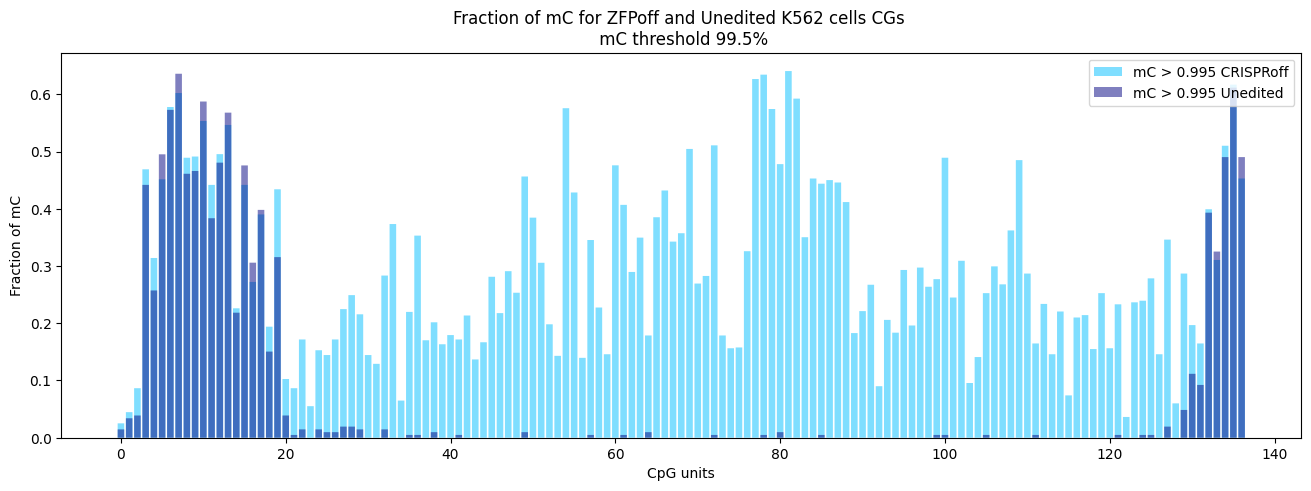

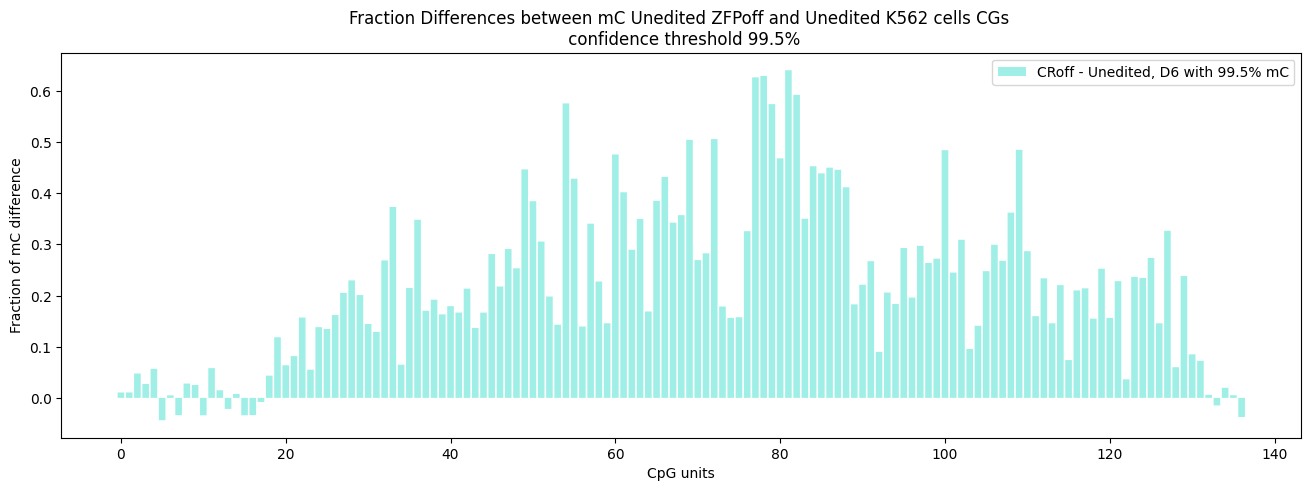

In [8]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_Zoff_High_mc0995_fracs)), CGs_Zoff_High_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_unedited_mc0995_fracs)), CGs_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for ZFPoff and Unedited K562 cells CGs \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_mCthresh_995 =   CGs_Zoff_High_mc0995_fracs  - CGs_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited ZFPoff and Unedited K562 cells CGs \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

# Lasso coefs load

In [35]:
# LASSO regression to find most important CGs for distinguishing CRISPRoff vs Unedited T cells day 6

lasso_abs_coefs = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/model_data/mC_thresh_0995/lasso_abs_coefs_silenced_unedited_K562_mCthresh0.995_2025-10-28.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/model_data/lasso_abs_coefs_silenced_unedited_Tcells_day6_mCthresh0.995_2025-10-21.npy") 
# /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/model_data/lasso_abs_coefs_silenced_unedited_Tcells_day6_mCthresh0.92025-10-14.npy")
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/model_data/lasso_abs_coefs_silenced_unedited_Tcells_day6_mCthresh0.92025-10-14.npy")
print("lasso_abs_coefs shape: ", lasso_abs_coefs.shape)


lasso_abs_coefs shape:  (137,)


/tmp/ipykernel_106661/785245811.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



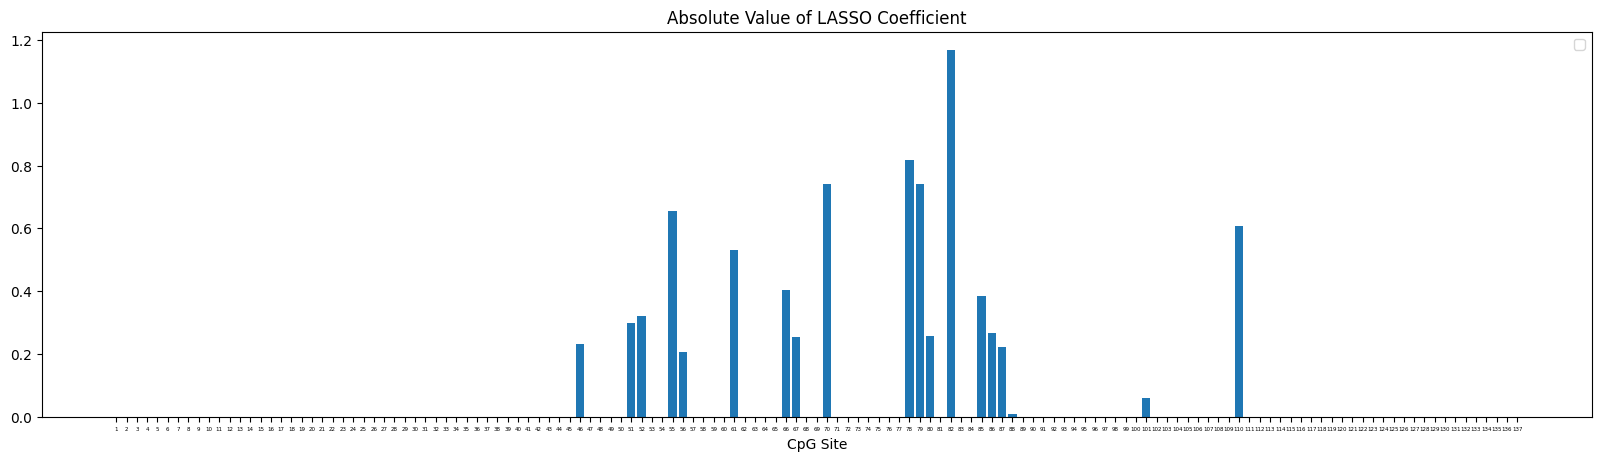

In [36]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
X_axis = np.arange(1, lasso_abs_coefs.shape[0]+1) # +1 # np.arange(10)+1    
plt.bar(X_axis,lasso_abs_coefs) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

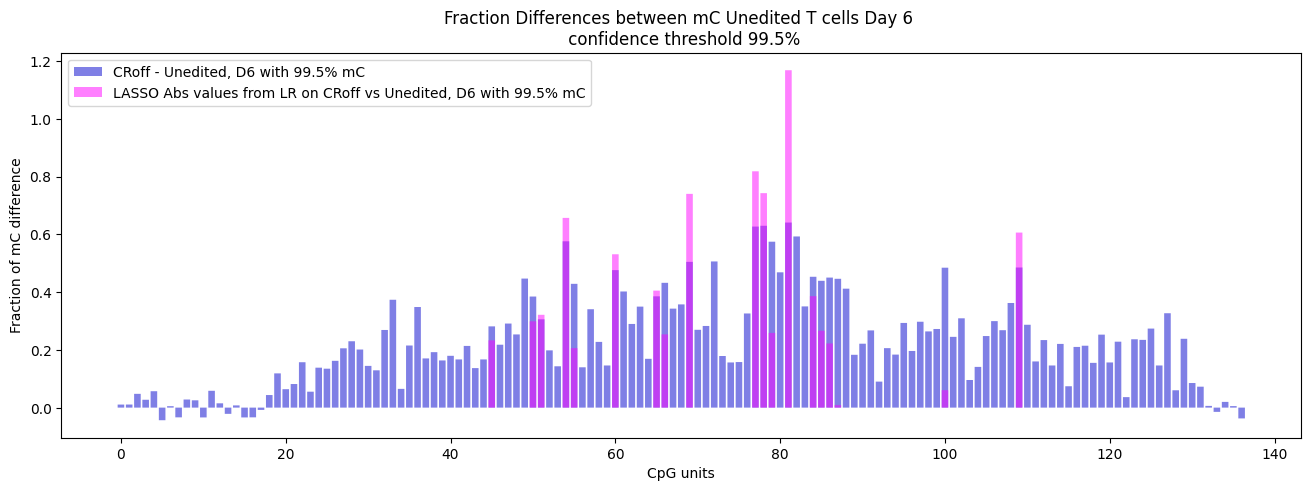

In [37]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on CRoff vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

Normalized LASSO coefficients: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.19936569 0.         0.
 0.         0.         0.25577183 0.27512221 0.         0.
 0.56232345 0.17623567 0.         0.         0.         0.
 0.45451516 0.         0.         0.         0.         0.34679139
 0.21702602 0.         0.         0.63354705 0.         0.
 0.         0.         0.         0.         0.         0.70041379
 0.63567495 0.22144334 0.         1.         0.         0.
 0.33039519 0.22789638 0.19019671 0.00733627 0.         0.
 0.         0.         0.         0.         0.         0.
 0.      

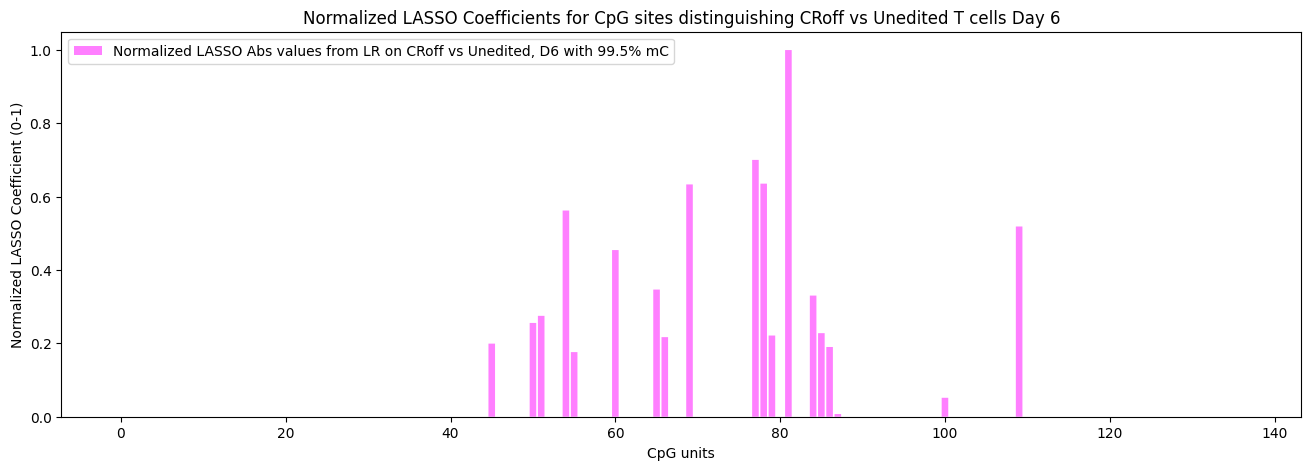

In [38]:
# Normalize the lasso coefficients to a 0-1 range
lasso_abs_coefs_norm = (lasso_abs_coefs - np.min(lasso_abs_coefs)) / (np.max(lasso_abs_coefs) - np.min(lasso_abs_coefs))
print("Normalized LASSO coefficients:", lasso_abs_coefs_norm) 

# plot normalized coefficients
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='Normalized LASSO Abs values from LR on CRoff vs Unedited, D6 with 99.5% mC', color='magenta'  )
plt.xlabel('CpG units')
plt.ylabel('Normalized LASSO Coefficient (0-1)')
plt.title('Normalized LASSO Coefficients for CpG sites distinguishing CRoff vs Unedited T cells Day 6')
plt.legend()
plt.show()  

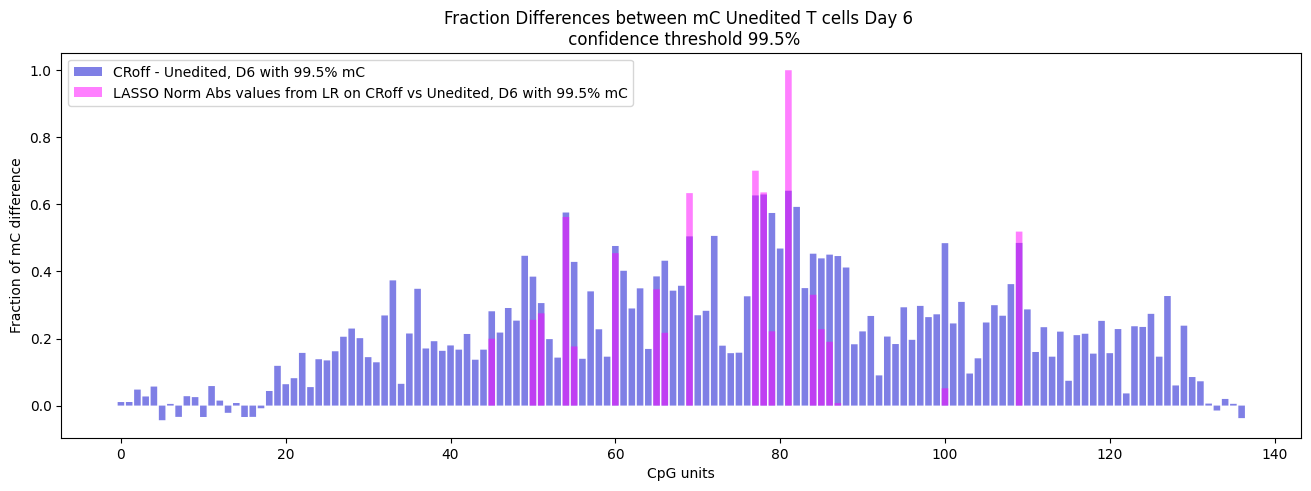

In [39]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR on CRoff vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

Normalized dif_D6_mCthresh_995: [0.07921601 0.07939423 0.13349044 0.1035338  0.14671373 0.
 0.07108202 0.01455008 0.10473187 0.10069706 0.01410452 0.14889204
 0.08553309 0.03228346 0.07496832 0.01409957 0.01457979 0.05214068
 0.12737633 0.23699453 0.15694681 0.18315082 0.29338291 0.14435225
 0.26584716 0.26070339 0.30047725 0.36379659 0.39949107 0.35763298
 0.27489207 0.25245554 0.45655769 0.60940037 0.15863004 0.37794071
 0.5727306  0.31262624 0.34433047 0.30242782 0.32588419 0.30757159
 0.37585647 0.26367381 0.30752703 0.47478118 0.38197552 0.48905897
 0.43398748 0.71657293 0.62571785 0.51047566 0.35341994 0.27285239
 0.90515466 0.68996792 0.26775318 0.56151234 0.39625332 0.27693176
 0.7593172  0.65125847 0.48701929 0.57472573 0.31067567 0.62673769
 0.69506713 0.56452731 0.585944   0.80113074 0.45744386 0.47682086
 0.80321498 0.32486435 0.2922294  0.29426908 0.54005109 0.97960315
 0.98372708 0.90311497 0.74818805 1.         0.92963088 0.57574557
 0.7256624  0.70531011 0.72158303 0.71

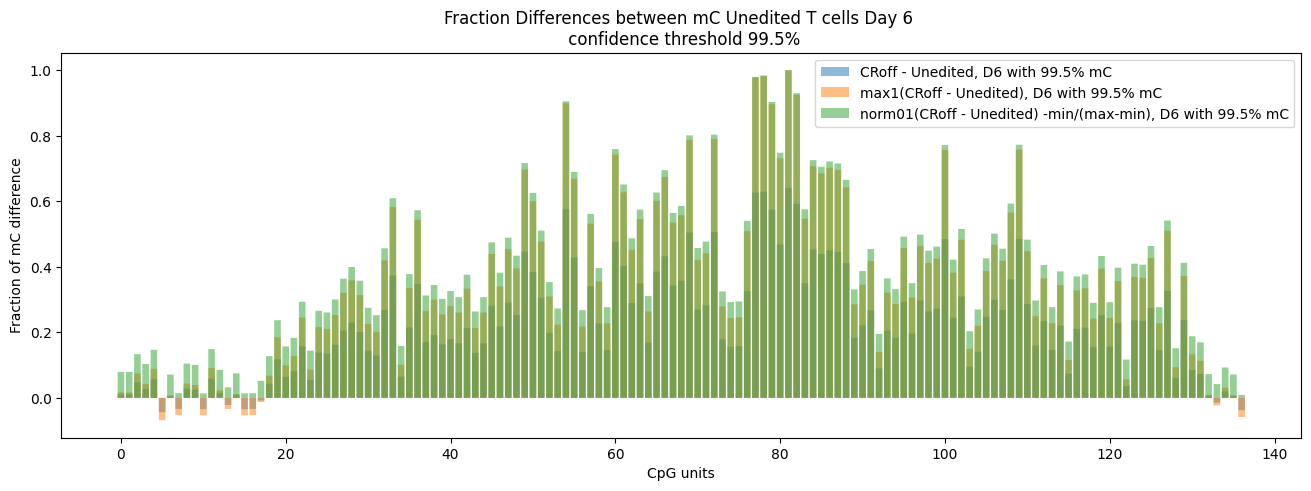

In [40]:
# Normolize dif_D6_mCthresh_995 to max 1
dif_D6_mCthresh_995_max1 = dif_mCthresh_995 / np.max(np.abs(dif_mCthresh_995))

# Normalized dif_D6_mCthresh_995 to be in range 0-1
dif_D6_mCthresh_995_norm01 = (dif_mCthresh_995 - np.min(dif_mCthresh_995)) / (np.max(dif_mCthresh_995) - np.min(dif_mCthresh_995))
print("Normalized dif_D6_mCthresh_995:", dif_D6_mCthresh_995_norm01)      

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC')#, color='mediumblue'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995_max1)), dif_D6_mCthresh_995_max1, snap=False, alpha=0.5, label='max1(CRoff - Unedited), D6 with 99.5% mC')#, color='mediumblue'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995_norm01)), dif_D6_mCthresh_995_norm01, snap=False, alpha=0.5, label='norm01(CRoff - Unedited) -min/(max-min), D6 with 99.5% mC')#, color='mediumblue'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

Normalized dif_D6_mCthresh_995: [0.07921601 0.07939423 0.13349044 0.1035338  0.14671373 0.
 0.07108202 0.01455008 0.10473187 0.10069706 0.01410452 0.14889204
 0.08553309 0.03228346 0.07496832 0.01409957 0.01457979 0.05214068
 0.12737633 0.23699453 0.15694681 0.18315082 0.29338291 0.14435225
 0.26584716 0.26070339 0.30047725 0.36379659 0.39949107 0.35763298
 0.27489207 0.25245554 0.45655769 0.60940037 0.15863004 0.37794071
 0.5727306  0.31262624 0.34433047 0.30242782 0.32588419 0.30757159
 0.37585647 0.26367381 0.30752703 0.47478118 0.38197552 0.48905897
 0.43398748 0.71657293 0.62571785 0.51047566 0.35341994 0.27285239
 0.90515466 0.68996792 0.26775318 0.56151234 0.39625332 0.27693176
 0.7593172  0.65125847 0.48701929 0.57472573 0.31067567 0.62673769
 0.69506713 0.56452731 0.585944   0.80113074 0.45744386 0.47682086
 0.80321498 0.32486435 0.2922294  0.29426908 0.54005109 0.97960315
 0.98372708 0.90311497 0.74818805 1.         0.92963088 0.57574557
 0.7256624  0.70531011 0.72158303 0.71

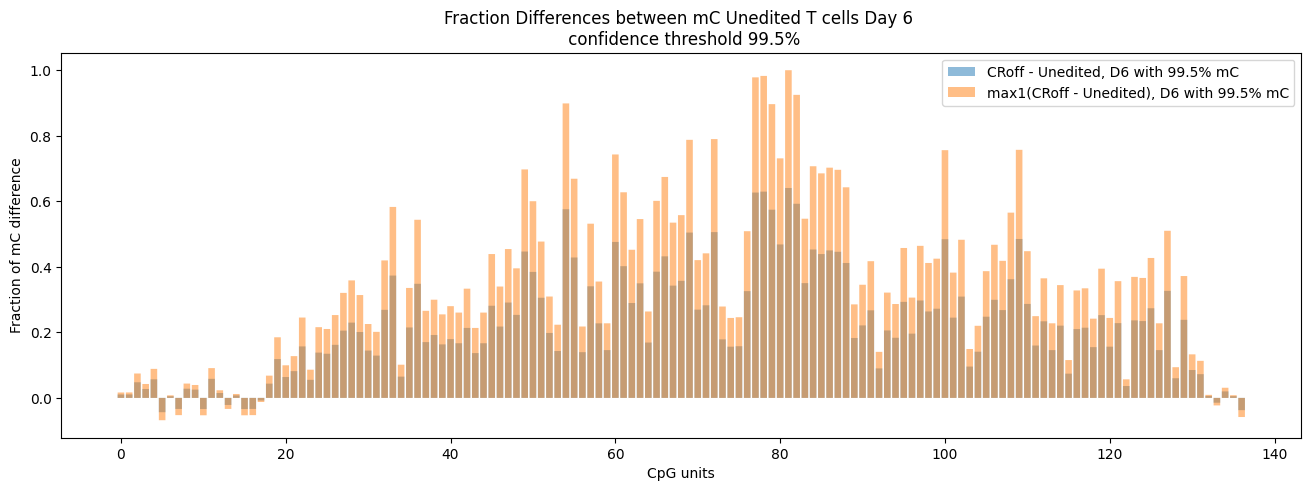

In [41]:
# Normolize dif_D6_mCthresh_995 to max 1
dif_D6_mCthresh_995_max1 = dif_mCthresh_995 / np.max(np.abs(dif_mCthresh_995))

# Normalized dif_D6_mCthresh_995 to be in range 0-1
dif_D6_mCthresh_995_norm01 = (dif_mCthresh_995 - np.min(dif_mCthresh_995)) / (np.max(dif_mCthresh_995) - np.min(dif_mCthresh_995))
print("Normalized dif_D6_mCthresh_995:", dif_D6_mCthresh_995_norm01)      

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC')#, color='mediumblue'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995_max1)), dif_D6_mCthresh_995_max1, snap=False, alpha=0.5, label='max1(CRoff - Unedited), D6 with 99.5% mC')#, color='mediumblue'  )
# plt.bar(np.arange(len(dif_D6_mCthresh_995_norm01)), dif_D6_mCthresh_995_norm01, snap=False, alpha=0.5, label='norm01(CRoff - Unedited) -min/(max-min), D6 with 99.5% mC')#, color='mediumblue'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

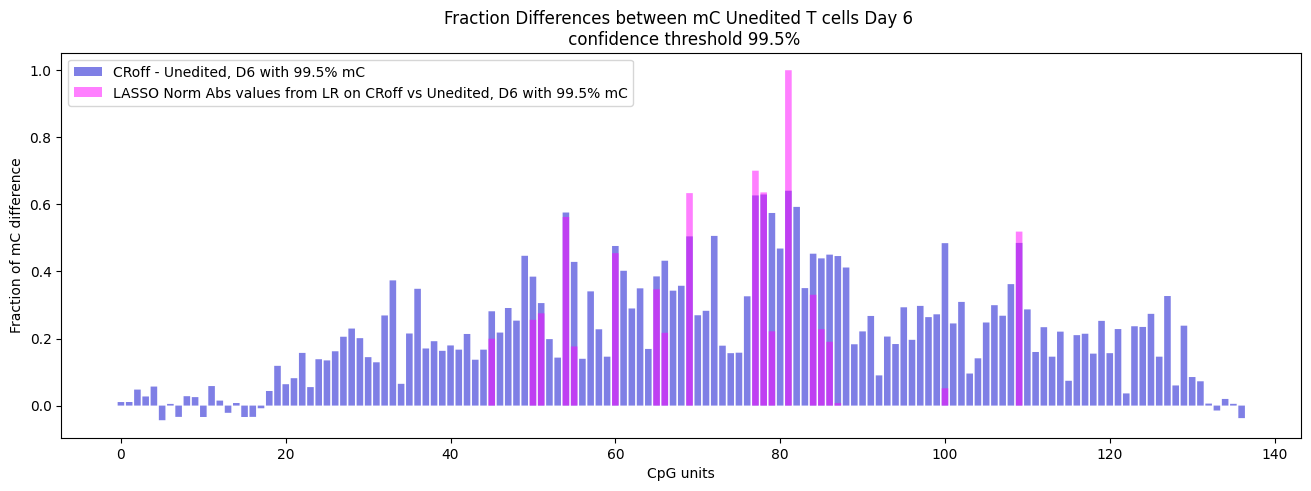

In [42]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR on CRoff vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

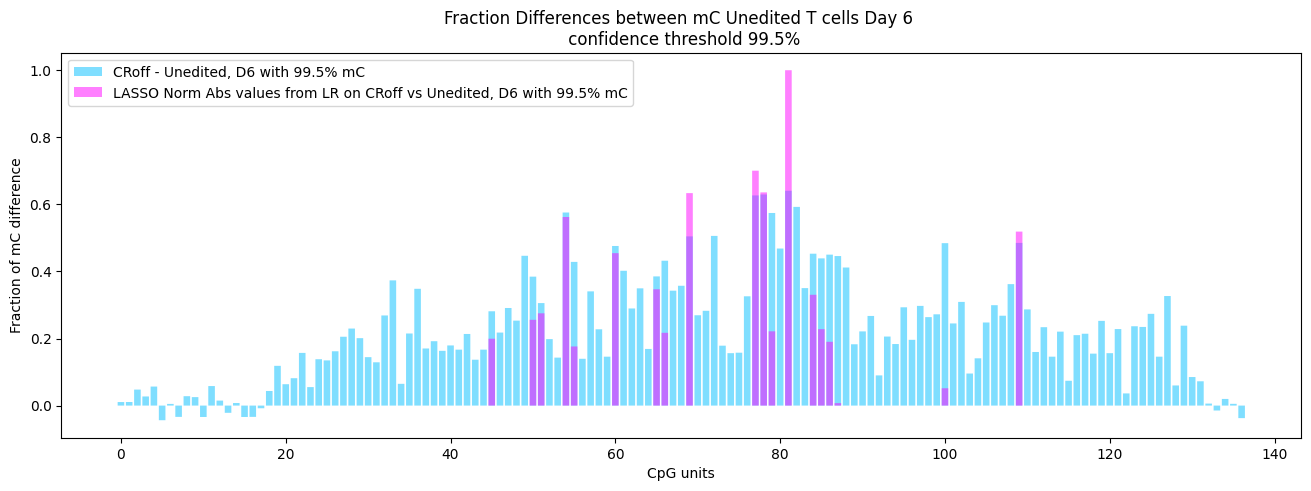

In [43]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='CRoff - Unedited, D6 with 99.5% mC', color='deepskyblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR on CRoff vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

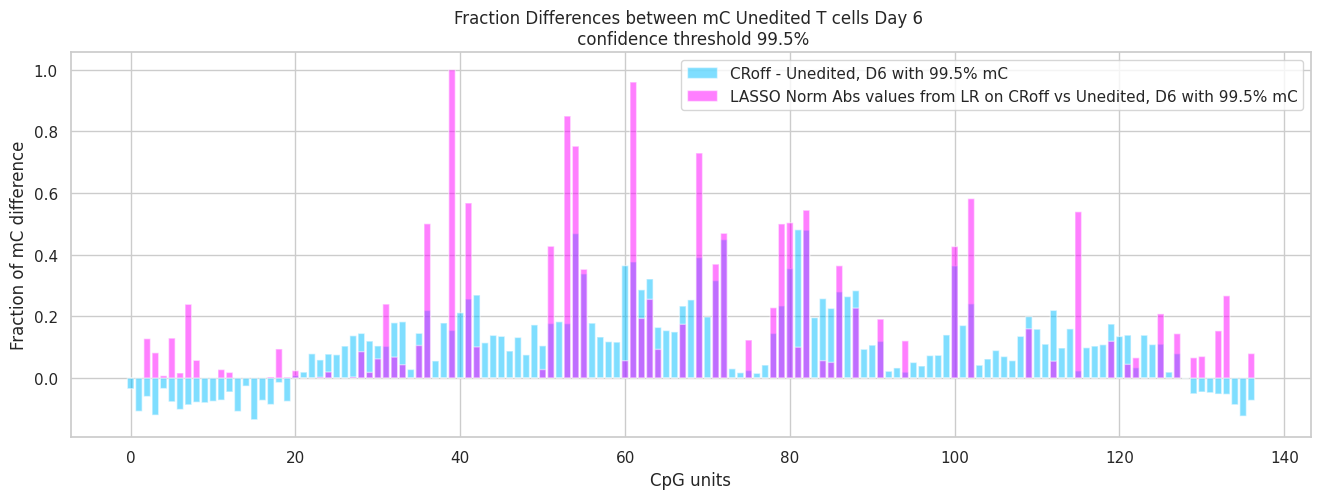

# Load SHAP coords

In [44]:
shap_sumabs_coefs = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/model_data/mC_thresh_0995/shap_sumabs_coefs_silenced_unedited_K562_mCthresh0.995_numReads829_2025-10-28.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/model_data/shap_sumabs_coefs_silenced_unedited_Tcells_day6_mCthresh0.92025-10-14.npy")
shap_sumabs_coefs

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.82 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.76 ,  1.125,  0.   ,  0.   ,  2.85 ,  0.91 ,
        0.   ,  0.   ,  0.   ,  0.   ,  2.49 ,  0.   ,  0.   ,  0.   ,
        0.   ,  1.505,  1.81 ,  0.   ,  0.   ,  4.255,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  6.63 ,  4.17 ,  1.365,
        0.   , 11.53 ,  0.   ,  0.   ,  2.36 ,  1.355,  1.09 ,  0.02 ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.365,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  2.96 ,  0.   ,  0.   ,
      

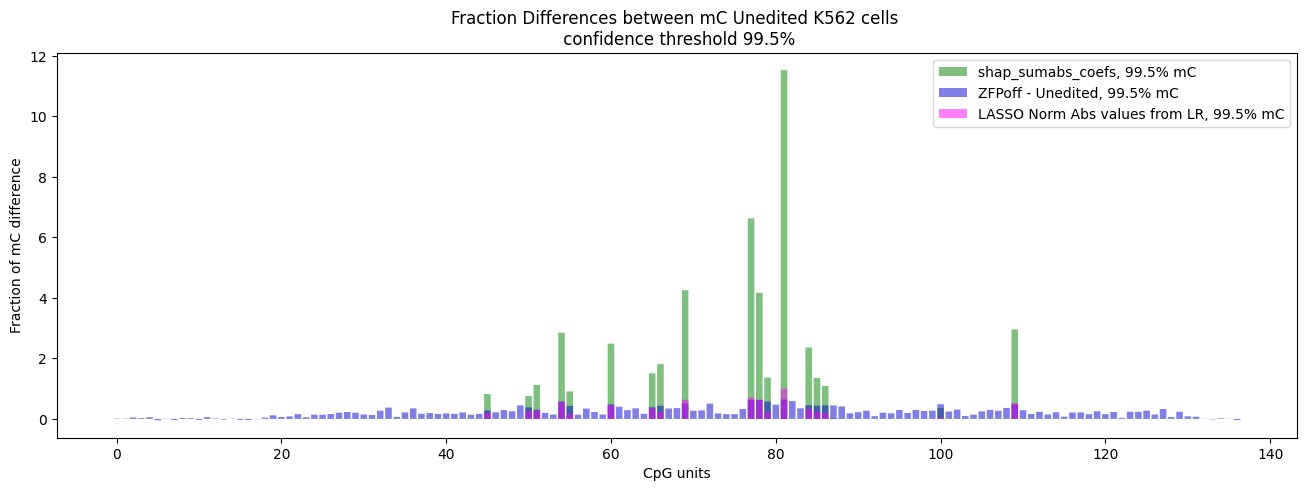

In [53]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(shap_sumabs_coefs)), shap_sumabs_coefs, snap=False, alpha=0.5, label='shap_sumabs_coefs, 99.5% mC', color='green'  )
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='ZFPoff - Unedited, 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR, 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited K562 cells \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

Normalized dif_D6_mCthresh_995: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07111882 0.         0.
 0.         0.         0.065915   0.09757155 0.         0.
 0.24718127 0.07892454 0.         0.         0.         0.
 0.21595837 0.         0.         0.         0.         0.13052905
 0.15698179 0.         0.         0.36903729 0.         0.
 0.         0.         0.         0.         0.         0.57502168
 0.36166522 0.11838682 0.         1.         0.         0.
 0.20468343 0.11751951 0.09453599 0.00173461 0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

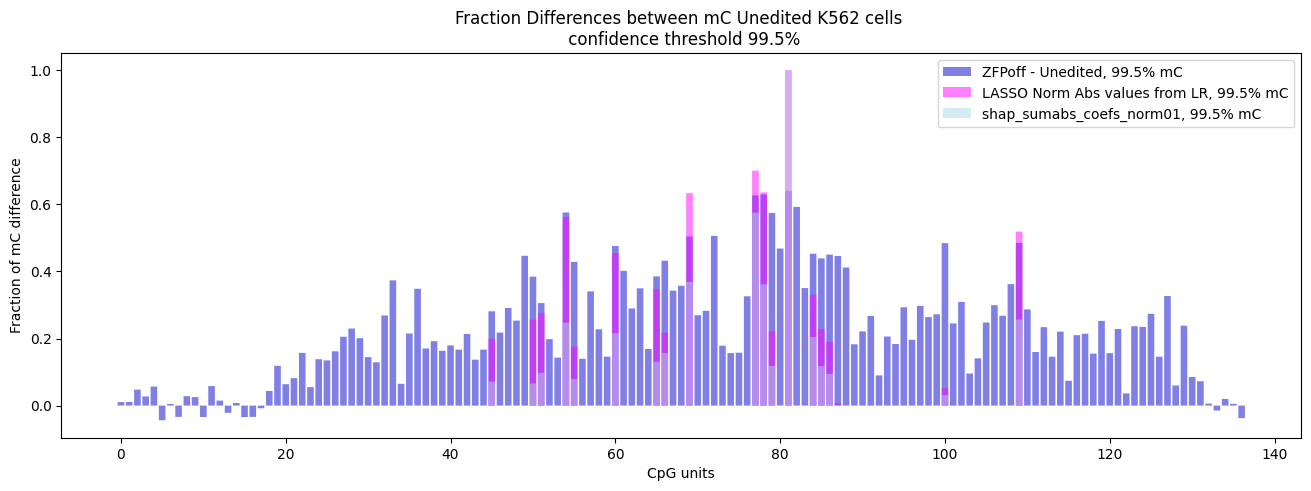

In [65]:
# Normalized dif_D6_mCthresh_995 to be in range 0-1
shap_sumabs_coefs_norm01 = (shap_sumabs_coefs - np.min(shap_sumabs_coefs)) / (np.max(shap_sumabs_coefs) - np.min(shap_sumabs_coefs))
print("Normalized dif_D6_mCthresh_995:", shap_sumabs_coefs_norm01)      


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_995)), dif_mCthresh_995, snap=False, alpha=0.5, label='ZFPoff - Unedited, 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR, 99.5% mC', color='magenta'  )
plt.bar(np.arange(len(shap_sumabs_coefs_norm01)), shap_sumabs_coefs_norm01, snap=False, alpha=0.5, label='shap_sumabs_coefs_norm01, 99.5% mC', color='lightblue'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited K562 cells \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

Normalized dif_D6_mCthresh_995: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07111882 0.         0.
 0.         0.         0.065915   0.09757155 0.         0.
 0.24718127 0.07892454 0.         0.         0.         0.
 0.21595837 0.         0.         0.         0.         0.13052905
 0.15698179 0.         0.         0.36903729 0.         0.
 0.         0.         0.         0.         0.         0.57502168
 0.36166522 0.11838682 0.         1.         0.         0.
 0.20468343 0.11751951 0.09453599 0.00173461 0.         0.
 0.         0.         0.         0.         0.         0.
 0.     

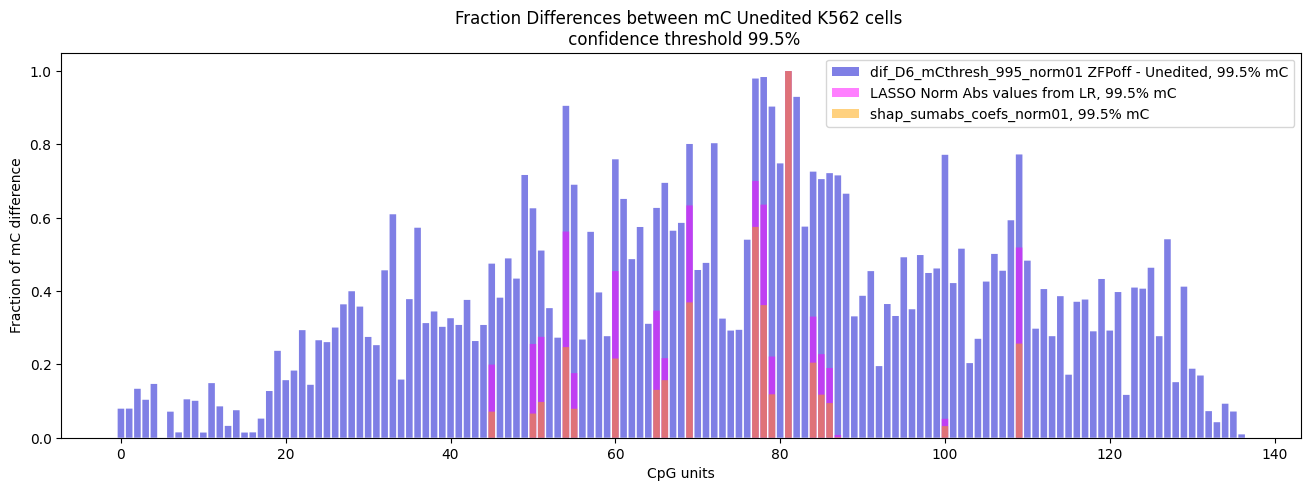

In [67]:
# # Normalized dif_D6_mCthresh_995 to be in range 0-1
shap_sumabs_coefs_norm01 = (shap_sumabs_coefs - np.min(shap_sumabs_coefs)) / (np.max(shap_sumabs_coefs) - np.min(shap_sumabs_coefs))
print("Normalized dif_D6_mCthresh_995:", shap_sumabs_coefs_norm01)      


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_norm01)), dif_D6_mCthresh_995_norm01, snap=False, alpha=0.5, label='dif_D6_mCthresh_995_norm01 ZFPoff - Unedited, 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='LASSO Norm Abs values from LR, 99.5% mC', color='magenta'  )
plt.bar(np.arange(len(shap_sumabs_coefs_norm01)), shap_sumabs_coefs_norm01, snap=False, alpha=0.5, label='shap_sumabs_coefs_norm01, 99.5% mC', color='orange'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited K562 cells \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

# Generate real CpG pair coordinates

In [68]:
import pandas as pd

# --- STEP 1: Load genomic sequence ---
# Paste your hg38 DNA sequence here as a string (no line breaks)
# Example placeholder sequence (replace with real one)
genomic_sequence = """
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGGGTTTCACCATGTTGGCCAGGCTAGTCTGGAACTCCTGACCTCAGGTGATCCTCCTGCCTTGGCCTCCCAAAGTGCTGAGATTACAGGCGTGAGCCACCACGCCCGGCCAAAATTTCCTTTTAAAAAAAGTTATTGCCAATAACTAAGTATGCTGGAAGGTGAATGCTTAGGACATTTAGTGTCACTGAGCTGTGTGATAGAGATAATATTTTTGACACTTTGCAGAGCTCATTGTTTTCTCTCCATATAAAGCTATGACATTCACATAATAAACATGTAGAGAGCTTTAACAGACTTCAATGTTAAGTCTTCTAACAGCTGCATAACTGGTCTTGCTTGAACCTGTCTTTTTCATAATGCTACCTTGCCTTTCACACCAATTCTGTGAGCCCAAGCAGGAATGAAGATTACCTATCTCTAATGGCAGGACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGGAATAAATGAAGACCTCATGCCACTTCTAAACACTGCCAGGACCTAACATACCTTGTGTTTTTATATCCAATATGGGAGTAAAGGTTAGATATTTTAACATCAAATATGAGGATGACACTAGATGGTTTTAAAAGCCCCCCACCATAACTTCTAAACTCCACAATGTTCGAATATTGTTAGGTTTCAGTGAAATCCTACAGTAGTCCCTTGCTTGGAATCACTGTAGGATTGGCTCCAGCAATGGGCAACACAAGGTTTGGTTCTATACAGTAGGTATGGGTCAAAGAAAATGCTATGATTGAAAAATTGCTGTTTTCCTCCTCAAAAAGCTCATACCAACCAGGAAAGAGCTATCAGAAAACCTTCAGGAAAGAATATAATGATAGGATATAACAAATACCCCCACAGCTGGTCCATAGACCAAAGTATAATTCCAAGTAGGGAATTTCACTTAACGAGGTAAGGCATTTAAGGGAAAAGGAATCTAGGCTAGGACTCTGCTAGCCAGACCCAGATAAATTATTACAGGGAAGCATGTTCTTGAGGCTATTCTCTATGAAGAAGGGCAACCCACCTTGCCATCTATATCCTTTCTGTTTTCGACAGGGGTGGTCCTAAGCTGGATAGATCTTTACTCTGACCAGTACCATATAGGTCTGTGGTTCTCAAACCTGGCTGCACAGTGTGGCACTTTAAGTAATCCTGATACCCAGTCCCATCCCCAAAGATGCTGATTTAATTTGTCTAAGGTGCAGTTTGGGCCTCTGGATTGGAACCAACCCATATACCCATCAATGATAGACTGGATAAAGAAAATGTGGCACATATACACCATAGAATACTACACAGCCATAAAAAAGGATGAGTTCATGTCCTATGCAGGGACATGGATGAAGCTGGAAACCATCAACCTCAGCAAACTAACATAAGACCAGAAAACCAAACACTGCATGTTCTTACTCATAAGTGGGAGTTGAACAATGAGAATACACAGACACAGGGAGGGGAACATCACACACGGGGGCCTGTTGGAGGGTGGGGGTTAGGGGAGGGATAGCATTAGGAGAAATACCTAATGTAGATGTTGGGTTGATGGGTGCAGCAAACCACCATGGCACGTGTATACCTATGTAACAAACCTGCATGTTCTGCACATGTATTCCAGAACTTAAAGAATATATATTTATATATGTATAAATATATATGAATATATAAATATAAATATATATATAAGCTCCCCACGTGATTCTAATGTGTGGCCAGTCTTGCAAACCTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATTTCTCTCTACAGTCAGTCTGGAGTAATCCCAAAGTGGTGTCTTTCGTAAATAAGGAGAACCCGGGTGAAGAAAATGACTCCCACCCGAACAAGGCATGAACAATGTTCACTCCCTACTGTGTTATTCAACCTGTTTCCCCAGGTCTCTGTTTTCACATTAGAGAGTGTTCTAGGAGATGACGCCCTTCCTCCTTAGTTATTTCCCCACCCTCGTGCTGGCCTTTGACAGACCTCCCAGTAGAGGGCCCAAGACGCGGGTAGAGCACCGCGTCTCAGCGCCTGAGTCTCAGCCCCCGAACTCCACCGCACCTGCAGGTCCCCTTGGCAGCACTCAAGCGCGGGGATGCTCCGCTTAGACGAACTCACGTGCGGGCAGCAAGGCCTGCGATACTTGAGCACCCCTCCCCCTCTCCCGTTTACACCCCGTTTGTGTTTACGTAGCGAGGAGATATTTAGGTTTCTAGAAGGCAGGTCATCGCAGGCCCCACCCAGCAGTGGAGAGAGTGAGTCCCAGAGGGTGTTGCCAGCGAGCTCCTCCTCCTTCCCCTCCCCACTCTCCCCGAGTCTAGGGCCCCCGGGGCGTATGACGCCGGAGCCCTCTGACCGCACCTCTGACCACAACAAACCCCTACTCCACCCGTCTTGTTTGTCCCACCCTTGGTGACGCAGAGCCCCAGCCCAGACCCCGCCCAAAGCACTCATTTAACTGGTATTGCGGAGCCACGAGGCTTCTGCTTACTGCAACTCGCTCCGGCCGCTGGGCGTAGCTGCGACTCGGCGGAGTCCCGGCGGCGCGTCCTTGTTCTAACCCGGCGCGCCATGACCGTCGCGCGGCCGAGCGTGCCCGCGGCGCTGCCCCTCCTCGGGGAGCTGCCCCGGCTGCTGCTGCTGGTGCTGTTGTGCCTGCCGGCCGTGTGGGGTGAGTAGGGGCCCGGCGGCCGGGGAAGCCCCTGGGCTGGGTGGGAGGTCCAAGTCGGTCTCTGAGACACGCACAGGGGCCGGCGACTTGGCAGGTGGGGAGCTTGGCCCGCGGTCGTGGTTCCCGCCGTCCTGTGCCTTTAAGGCTCTCGCCGCTCACCAGCATTTGGGGCTCCTGCTGTGTCGGCCCCCAGCTGACTTGGCTTTAGGGGTCGGCGTGGAGGGTTAAAGAGGCCCCGGCTGGGTTTGCGGAGCAGCCAAGCCTGGCAAAATCGAAAGGGAGGGCTCAAAGAGACTGTATCCTTAACCCCCAAAAAGCTGGTCTAAAAGGATGGGAGGCCAGACCGCTGACCGTTCCCCACTCTCGACAGAGTCCAGCCGTGTGGAGCACACGATGCTGCAAACTTGCATGTCATCTCTTTCAGGTGTGGCATTTCAAGGGGGCTTGTGTCTTGAAAACAGCAACTGTGAGGACACTTGATAGTCATTTCCTTCAGTTCTGCTTTTGTCTCCCTAGGTGACTGTGGCCTTCCCCCAGATGTACCTAATGCCCAGCCAGCTTTGGAAGGCCGTACAAGTTTTCCCGAGGATACTGTAATAACGTACAAATGTGAAGAAAGCTTTGTGAAAATTCCTGGCGAGAAGGACTCAGTGATCTGCCTTAAGGGCAGTCAATGGTCAGATATTGAAGAGTTCTGCAATCGTAAGTTCTTCATCTTTTTAGAAAAGTTCTGGGAATGGAATGTATCTTAAATTTATTTTTATATACCTTTGGAGTGACTAGTAATTGATAGTTCTCTAGCGTTACTAAACCCCAGGGTATACCCTGTTGGCACGTCACACTCCAGCTAATTGAAGACATTTACCACCCTGAGTAGGTCCTGCTGCTTCATTAAGAGTTTTTCTTCCTAACACTGTACCTCTTGAACGAACTAGTAGAGAAAATAAACAATAGGTATTGTTTAGGGAGTAAACATATAAAATATATTTGGCAATTGCCTTGAGACACATAGCGTAAATGATATGTTTTCTTAAGTATTTTATAAAGTAGGACTTACCAAATACAACTCTGTGGTGGCATTTTTAAAAGCTCTCAATATTTACTTCAAAATCTGTTATACTTGTACATATTTATAGGGTACATGTGATATTCTGGCACATGCATACAGTGTGTCATGATCAATCAGGGTAATTGGATAGCCAGTACCTCAAACACTTGGTGTTTGTGTGGAGAATATTCCAAATCTTCTCTTCTTGCTACTTTGAAAAAATATATGTATATATATAAATTGGGATATATATATAGGGAGAGAGATATATATAATTGGGATATATATATATAAGGAGATATATAATTGGGATATATATAAGGAGATATATATAGGGAGAGATATATATATATAGGGAGATATATATATATAGGGAGAGAGATATATATAGGGAGAGAGAGATGTATAAACTGGGATATAGACAGGTAGATAGGTTGATTGTTAAAAATGAATAAGAGGCCCAGTGAAGAGTTGTTTGGGGGCTAACACAGTAACCGTGTTTGATACTGATACCTAGTAGAATTAAAAGAAATGAAGATTTCTTGTTTTAGGTGAATATACATACAGTCATCCACACCTTATGTGCCCTTTGATTTCATAAAATATATATTGGCATTATCTTGGAGGAAAAAAATCTGTTACTTACATAGCCCTGTATTAGCTTTGAGATATATGAGTAGAGATAAAGATAAAGAGACCCGATAACCTGACTTTGAACAACTTAAATCAATAGAAGCTACTGTAAATACAGAAATTGGCACAAATACCTTTAGAAGCCATGCGTGAAATAGGCTTTAACTTTTTATTTTTATCCACAATAGAGGCAGTAGGATGAAGTACATAGTCTTTGCACATGTATCATGTTTTAACTCTTCCCCATGTTATTACTTTATCCAATCCTCCAAACAACCTTATGAGGTAAGTTGGGGCTCTTACACTCTTTTTATGGCGGAGGAGACAGACCCCAGTAGTTTAATAACTTCCTCAAGAGCAGCAGCTTTTACGCCAAAACCAAGGTGTAAACTTGGGTCTTCTGACTACAAATCCAATGATGACCCTTCCACTTGACCATGCCTCTCTAGATTCACATTTGTGGGCAATCTGTTTACAGATGTAAATACTTTATGTATACAATTTGTGGGCAATCTGTTTACAGGTGTAAATACTTTATGTATACAATTGACTCATCCTTGCCCCCAGGGCTCATGGGAATTAAATGAGTTTGTACGTAAATAAATATTAGCTGCTATTATTGTTGTGCAGGACATTAGTCCAGGGGTCTGGAAATACCCTATTCCTGTACTGTATGGTGCTGTGTAGTTCTTTAGGGCAGGGTAAGGAAACCAACATTTATTGAATGCCAGAACTGGGCCAGGCAACTTAAATTTTTTTTTTTTTTTAAGTGGGGATAGTGATATGTGTGTACCAACTCTACTTCCTAAGCCTCTAGTAACTAGGAAACAAAGTATACATGTGAATACATTTGCTACATTGCAAGTGCCATGGTGATATTAATATAGTTAAGTACTAAATATGCGCAAAGCAGTAAAGAAAGGGGGTTATTAGGGTCCAGATAATTAAATATAGATTATAAAACAAAAATTGATACTACATTTTTTGTTGCTGCTTTTGTTAATACTTTTA
""".replace('\n', '').upper()

# Starting coordinate in hg38 for this sequence
region_start_hg38 = 207318058
region_chr = "chr1"

# --- STEP 2: Scan for CpG sites ---
cpg_records = []
for i in range(len(genomic_sequence) - 1):
    if genomic_sequence[i:i+2] == "CG":
        chrom_start = region_start_hg38 + i        # 0-based start
        chrom_end = chrom_start + 2                # BED-style: end is exclusive
        cpg_records.append({
            "chrom": region_chr,
            "start": chrom_start,
            "end": chrom_end,
            "name": f"CpG_{len(cpg_records) + 1}",
            "score": 0,
            "strand": "+"
        })

# --- STEP 3: Create BED dataframe ---
df_cpgs = pd.DataFrame(cpg_records)

# Optional: Save to BED
df_cpgs.to_csv("real_CpG_coords_hg38.bed", sep="\t", index=False, header=False)

# Preview
print(df_cpgs.head())
print(f"\nTotal CpGs found: {len(df_cpgs)}")


  chrom      start        end   name  score strand
0  chr1  207318092  207318094  CpG_1      0      +
1  chr1  207318412  207318414  CpG_2      0      +
2  chr1  207318471  207318473  CpG_3      0      +
3  chr1  207318809  207318811  CpG_4      0      +
4  chr1  207318842  207318844  CpG_5      0      +

Total CpGs found: 137


Additions:

T2T Coordinates — already present

hg38 Coordinates — mapped via known offset

TSS-relative distance (from TSS = center of region)

Promoter/gene body/upstream region classification (already present)

ΔmC values, significance

CpG Index

In [90]:
import numpy as np
import pandas as pd

# --- STEP 1: Load hg38 genomic sequence as a string ---
# genomic_sequence = """
# <PASTE_FULL_SEQUENCE_HERE>
# """.replace('\n', '').upper()

# --- STEP 2: Define genomic parameters ---
region_chr = "chr1"
region_start_hg38 = 207318058  # Start of your region in hg38
cd55_tss_hg38 = 207321678           # Real CD55 TSS in hg38
t2t_offset = -734704           # T2T = hg38 + offset
cd55_tss_t2t= cd55_tss_hg38 + t2t_offset

# --- STEP 3: Find CpG dinucleotides ---
cpg_records = []
for i in range(len(genomic_sequence) - 1):
    if genomic_sequence[i:i+2] == "CG":
        start_hg38 = region_start_hg38 + i
        end_hg38 = start_hg38 + 2
        start_t2t = start_hg38 + t2t_offset
        end_t2t = end_hg38 + t2t_offset
        rel_tss_hg38 = start_hg38 - cd55_tss_hg38
        rel_tss_t2t = start_t2t - cd55_tss_t2t

        cpg_records.append({
            "chrom": region_chr,
            "start_hg38": start_hg38,
            "end_hg38": end_hg38,
            "start_T2T": start_t2t,
            "end_T2T": end_t2t,
            "rel_to_TSS_hg38": rel_tss_hg38,
            "rel_to_TSS_T2T": rel_tss_t2t,
            "name": f"CpG_{len(cpg_records) + 1}",
            "strand": "+"
        })

# --- STEP 4: Create DataFrame from CpG positions ---
df_cpgs = pd.DataFrame(cpg_records)

# --- STEP 5: Add ΔmC values ---
# Replace this with your actual 1D array of 142 values
# dif_D6_mCthresh_995 = np.linspace(-0.1, 0.5, len(df_cpgs))  # Simulated for structure

if len(dif_mCthresh_995) != len(df_cpgs):
    raise ValueError("ΔmC array length does not match number of CpGs found!")

df_cpgs["ΔmC"] = dif_mCthresh_995
df_cpgs["CpG Index"] = np.arange(1, len(dif_mCthresh_995)+1)
df_cpgs["score"] = (df_cpgs["ΔmC"] * 1000).round().clip(lower=0, upper=1000).astype(int)

# --- STEP 6: Annotate region (Promoter, Flank, Gene Body) ---
def classify_region(pos, tss, window=1000):
    if tss - window <= pos <= tss + window:
        return "Promoter"
    elif pos < tss - window:
        return "Upstream Flank"
    else:
        return "Gene Body / Downstream"

df_cpgs["Region"] = df_cpgs["start_hg38"].apply(lambda x: classify_region(x, cd55_tss_hg38))

# --- STEP 7: Final column ordering ---
df_cpgs = df_cpgs[[
    "CpG Index", "chrom", "start_hg38", "end_hg38",
    "start_T2T", "end_T2T",
    "name", "ΔmC", "score",
    "rel_to_TSS_hg38", "rel_to_TSS_T2T",
    "Region", "strand"
]]

# --- STEP 8: Save and preview ---
df_cpgs.to_csv("CD55_CpGs_Annotated_T2T_hg38.csv", index=False)
print(df_cpgs.head())
print(f"\n✅ Total CpGs found: {len(df_cpgs)}")

df_cpgs

   CpG Index chrom  start_hg38   end_hg38  start_T2T    end_T2T   name  \
0          1  chr1   207318092  207318094  206583388  206583390  CpG_1   
1          2  chr1   207318412  207318414  206583708  206583710  CpG_2   
2          3  chr1   207318471  207318473  206583767  206583769  CpG_3   
3          4  chr1   207318809  207318811  206584105  206584107  CpG_4   
4          5  chr1   207318842  207318844  206584138  206584140  CpG_5   

        ΔmC  score  rel_to_TSS_hg38  rel_to_TSS_T2T          Region strand  
0  0.010559     11            -3586           -3586  Upstream Flank      +  
1  0.010681     11            -3266           -3266  Upstream Flank      +  
2  0.047697     48            -3207           -3207  Upstream Flank      +  
3  0.027199     27            -2869           -2869  Upstream Flank      +  
4  0.056745     57            -2836           -2836  Upstream Flank      +  

✅ Total CpGs found: 137


,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+


<BarContainer object of 137 artists>

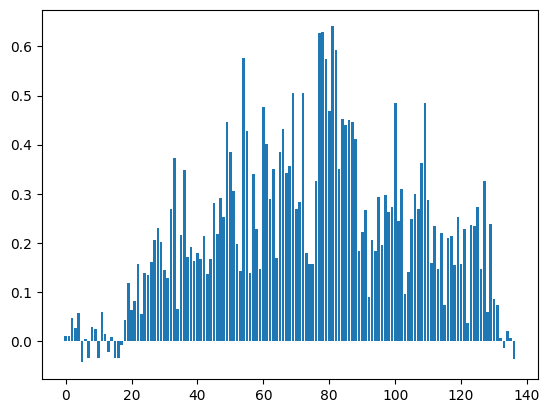

In [91]:
plt.bar(np.arange(len(dif_mCthresh_995)), df_cpgs['ΔmC'])

Absolutely — here's the code to export your annotated CpG DataFrame (df_cpgs) to a clean, UCSC-compatible BED file with:

chr, start, end

CpG name

score scaled from ΔmC (0–1000)

unstranded (.)

In [92]:
# --- STEP 1: Create BED DataFrame from annotated CpG table ---
df_bed = pd.DataFrame({
    "chrom": df_cpgs["chrom"],
    "start": df_cpgs["start_hg38"],
    "end": df_cpgs["end_hg38"],
    "name": df_cpgs["name"],
    "score": df_cpgs["score"],
    "strand": df_cpgs["strand"]
})

# --- STEP 2: Sort by genomic start (optional but recommended) ---
df_bed = df_bed.sort_values(by=["chrom", "start"])

# --- STEP 3: Save as tab-delimited BED file (no header) ---
df_bed.to_csv("CD55_CpGs_UCSC_hg38.bed", sep="\t", index=False, header=False)

print("✅ UCSC BED file saved as: CD55_CpGs_UCSC_hg38.bed")

df_bed

✅ UCSC BED file saved as: CD55_CpGs_UCSC_hg38.bed


,chrom,start,end,name,score,strand
0,chr1,207318092,207318094,CpG_1,11,+
1,chr1,207318412,207318414,CpG_2,11,+
2,chr1,207318471,207318473,CpG_3,48,+
3,chr1,207318809,207318811,CpG_4,27,+
4,chr1,207318842,207318844,CpG_5,57,+
...,...,...,...,...,...,...
132,chr1,207323695,207323697,CpG_133,6,+
133,chr1,207323863,207323865,CpG_134,0,+
134,chr1,207323917,207323919,CpG_135,20,+
135,chr1,207324141,207324143,CpG_136,5,+


In [93]:
# import numpy as np
# import pandas as pd

# # --- STEP 0: Load your real ΔmC array ---
# # Replace this with your real array
# # dif_D6_mCthresh_995 = np.array([
# #     # Your full ΔmC array goes here (142 values)
# # ])

# # # --- STEP 1: Define region and reference info ---
# # region_chr = "chr1"
# # region_start_T2T = 206583354
# # region_end_T2T = 206589854
# # region_length = region_end_T2T - region_start_T2T
# # tss_T2T = region_start_T2T + (region_length // 2)  # Assume midpoint as TSS

# # # T2T → hg38 coordinate offset
# # offset_hg38_vs_t2t = +734704
# # region_start_hg38 = region_start_T2T + offset_hg38_vs_t2t
# # region_end_hg38 = region_end_T2T + offset_hg38_vs_t2t
# # cd55_tss_hg38 = tss_T2T + offset_hg38_vs_t2t

# # --- STEP 2: Generate CpG positions ---
# cpg_count = len(dif_D6_mCthresh_995)
# cpg_indices = np.arange(1, cpg_count + 1)
# cpg_positions_T2T = np.linspace(region_start_T2T, region_end_T2T, cpg_count, dtype=int)
# cpg_positions_hg38 = cpg_positions_T2T + offset_hg38_vs_t2t
# rel_to_TSS_T2T = cpg_positions_T2T - tss_T2T
# rel_to_TSS_hg38 = cpg_positions_hg38 - cd55_tss_hg38

# # --- STEP 3: Region classifier ---
# def classify_region(pos, tss, window=1000):
#     if tss - window <= pos <= tss + window:
#         return "Promoter"
#     elif pos < tss - window:
#         return "Upstream Flank"
#     else:
#         return "Gene Body / Downstream"

# # --- STEP 4: Create annotation DataFrame ---
# df_dmc = pd.DataFrame({
#     "Chromosome": region_chr,
#     "CpG Index": cpg_indices,
#     "Genomic Position (T2T v2.0)": cpg_positions_T2T,
#     "Genomic Position (hg38)": cpg_positions_hg38,
#     "ΔmC": dif_D6_mCthresh_995,
#     "T2T_rel_to_TSS": rel_to_TSS_T2T,
#     "hg38_rel_to_TSS": rel_to_TSS_hg38,
# })

# # --- STEP 5: Annotate significance & region type ---
# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)
# df_dmc["Region"] = df_dmc["Genomic Position (T2T v2.0)"].apply(
#     lambda x: classify_region(x, tss_T2T)
# )

# # --- STEP 6: Optional rearrange columns ---
# df_dmc = df_dmc[[
#     "Chromosome", "CpG Index", 
#     "Genomic Position (T2T v2.0)", "T2T_rel_to_TSS",
#     "Genomic Position (hg38)", "hg38_rel_to_TSS",
#     "ΔmC", "Significant", "Region"
# ]]

# # --- STEP 7: Save and preview ---
# df_dmc.to_csv("Annotated_Delta_mC_T2T_hg38.csv", index=False)
# print(df_dmc.head())


In [94]:
# # import numpy as np
# # import pandas as pd

# # # ΔmC array (replace with your actual data if loading from file)
# # # dif_D6_mCthresh_995 = np.array([...])  # Your full ΔmC array goes here

# # # Metadata from user
# # region_chr = "chr1"
# # region_start = 206583354
# # region_end = 206589854
# # region_length = region_end - region_start
# # cpg_count = len(dif_D6_mCthresh_995)

# # # Step 1: Generate CpG index and position
# # cpg_indices = np.arange(1, cpg_count + 1)
# # cpg_positions = np.linspace(region_start, region_end, cpg_count, dtype=int)

# # # Step 2: Define TSS (midpoint) and promoter boundaries
# # cd55_tss = region_start + (region_length // 2)  # Assuming TSS = center
# # promoter_start = cd55_tss - 1000
# # promoter_end = cd55_tss + 1000

# # Step 3: Classify region
# def classify_region(pos):
#     if promoter_start <= pos <= promoter_end:
#         return "Promoter"
#     elif pos < promoter_start:
#         return "Upstream Flank"
#     else:
#         return "Gene Body / Downstream"

# # Step 4: Create DataFrame
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic Position (T2T v2.0)": cpg_positions
# })

# # Step 5: Annotate significant ΔmC
# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)

# # Step 6: Annotate region type
# df_dmc["Region"] = df_dmc["Genomic Position (T2T v2.0)"].apply(classify_region)

# # Step 7: Add chromosome column
# df_dmc["Chromosome"] = region_chr

# # Step 8: Rearrange columns
# df_dmc = df_dmc[[
#     "Chromosome", "CpG Index", "Genomic Position (T2T v2.0)",
#     "ΔmC", "Significant", "Region"
# ]]

# # Optional: save to CSV
# df_dmc.to_csv("Annotated_Delta_mC_T2T.csv", index=False)

# # Print preview
# print(df_dmc.head())


In [95]:
# import pandas as pd

# # --- STEP 1: Load genomic sequence (hg38) ---
# genomic_sequence = """
# GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGT...
# """.replace('\n', '').upper()

# # --- STEP 2: Define coordinates ---
# region_chr = "chr1"
# region_start_hg38 = 207318058
# region_end_hg38 = 207324558

# # TSS position (center of the region, or from annotation)
# cd55_tss_hg38 = 207321308  # ← Use actual hg38 TSS here
# tss_t2t  = 206586604  # ← Known T2T TSS from earlier

# # Offset between hg38 and T2T
# t2t_offset = -734704  # tss_t2t = cd55_tss_hg38 + offset

# # --- STEP 3: Scan sequence for CpG dinucleotides ---
# cpg_records = []
# for i in range(len(genomic_sequence) - 1):
#     if genomic_sequence[i:i+2] == "CG":
#         start_hg38 = region_start_hg38 + i
#         end_hg38 = start_hg38 + 2
#         start_t2t = start_hg38 + t2t_offset
#         end_t2t = end_hg38 + t2t_offset
#         rel_to_tss_hg38 = start_hg38 - cd55_tss_hg38
#         rel_to_tss_t2t = start_t2t - tss_t2t

#         cpg_records.append({
#             "chrom": region_chr,
#             "start_hg38": start_hg38,
#             "end_hg38": end_hg38,
#             "start_T2T": start_t2t,
#             "end_T2T": end_t2t,
#             "rel_to_TSS_hg38": rel_to_tss_hg38,
#             "rel_to_TSS_T2T": rel_to_tss_t2t,
#             "name": f"CpG_{len(cpg_records) + 1}",
#             "score": 0,
#             "strand": "."
#         })

# # --- STEP 4: Create DataFrame ---
# df_cpgs = pd.DataFrame(cpg_records)

# # --- STEP 5: Export if needed ---
# df_cpgs.to_csv("CpGs_hg38_T2T_with_TSS_relative.bed", sep="\t", index=False)

# # --- Preview ---
# print(df_cpgs.head())
# print(f"Total CpGs found: {len(df_cpgs)}")

# df_cpgs

# use the tools samtools python to get the real corresponding hg38 DNA sequence for our ROI
chr1:207318058–207324558 (hg38)
🧬 Requirements
Ensure you have:

The hg38 reference FASTA file: hg38.fa

The .fai index file: hg38.fa.fai

The samtools CLI tool installed

The Python subprocess module (built-in)

✅ Python Code Using samtools faidx
python
Copy code


In [96]:

# import subprocess

# # --- Step 1: Define your input ---
# fasta_path = "hg38.fa"  # Path to your local hg38 reference genome
# region = "chr1:207318058-207324558"

# # --- Step 2: Use samtools to extract sequence ---
# def fetch_sequence_with_samtools(fasta, region):
#     try:
#         result = subprocess.run(
#             ["samtools", "faidx", fasta, region],
#             check=True,
#             stdout=subprocess.PIPE,
#             stderr=subprocess.PIPE,
#             text=True
#         )
#         # Clean FASTA output: remove header and join lines
#         lines = result.stdout.strip().split("\n")
#         sequence = ''.join(lines[1:]).upper()
#         return sequence
#     except subprocess.CalledProcessError as e:
#         print("Error running samtools:", e.stderr)
#         return None

# # --- Step 3: Fetch sequence ---
# genomic_sequence = fetch_sequence_with_samtools(fasta_path, region)

# # --- Step 4: Preview ---
# if genomic_sequence:
#     print("Extracted sequence length:", len(genomic_sequence))
#     print("First 100 bases:", genomic_sequence[:100])
# else:
#     print("Failed to extract sequence.")


In [97]:
df_cpgs

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+


<Axes: >

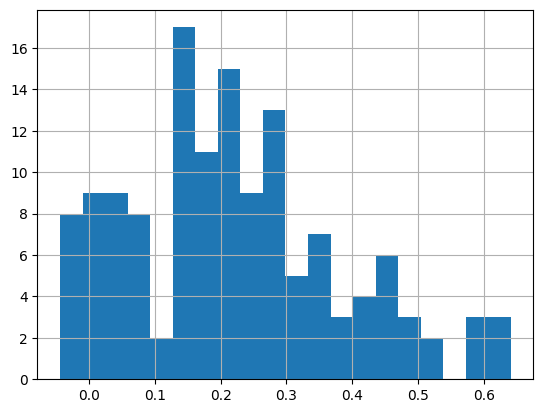

In [98]:
df_cpgs['ΔmC'].hist(bins=20)

In [100]:

# # Step 2: Create a DataFrame
# df_dmc = pd.DataFrame({
#     "CpG Index": np.arange(1, len(dif_D6_mCthresh_995)+1),
#     "ΔmC": dif_D6_mCthresh_995
# })

# Step 3: Define significance threshold
# You can adjust the thresholds based on biological interest

mC_signif_positive_thresh = 0.3
mC_signif_negative_thresh = -0.1

df_cpgs["Significant"] = (df_cpgs["ΔmC"] > mC_signif_positive_thresh) | (df_cpgs["ΔmC"] < mC_signif_negative_thresh)

# Step 4: Filter top differentially methylated CpGs
top_dmc = df_cpgs[df_cpgs["Significant"]].sort_values(by="ΔmC", ascending=False)

# Step 5 (optional): Save as CSV
top_dmc.to_csv("Top_Differential_mCs.csv", index=False)

# Print or display
# print(top_dmc)
top_dmc

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand,Significant
81,82,chr1,207321760,207321762,206587056,206587058,CpG_82,0.640614,641,82,82,Promoter,+,True
78,79,chr1,207321739,207321741,206587035,206587037,CpG_79,0.629479,629,61,61,Promoter,+,True
77,78,chr1,207321736,207321738,206587032,206587034,CpG_78,0.626657,627,58,58,Promoter,+,True
82,83,chr1,207321762,207321764,206587058,206587060,CpG_83,0.592463,592,84,84,Promoter,+,True
54,55,chr1,207321383,207321385,206586679,206586681,CpG_55,0.575715,576,-295,-295,Promoter,+,True
79,80,chr1,207321741,207321743,206587037,206587039,CpG_80,0.574320,574,63,63,Promoter,+,True
72,73,chr1,207321709,207321711,206587005,206587007,CpG_73,0.505962,506,31,31,Promoter,+,True
69,70,chr1,207321693,207321695,206586989,206586991,CpG_70,0.504536,505,15,15,Promoter,+,True
109,110,chr1,207322018,207322020,206587314,206587316,CpG_110,0.484997,485,340,340,Promoter,+,True
100,101,chr1,207321935,207321937,206587231,206587233,CpG_101,0.484329,484,257,257,Promoter,+,True


In [101]:
# --- STEP 1: Create BED DataFrame from annotated CpG table ---
top_dmc_bed = pd.DataFrame({
    "chrom": top_dmc["chrom"],
    "start": top_dmc["start_hg38"],
    "end": top_dmc["end_hg38"],
    "name": top_dmc["name"],
    "score": top_dmc["ΔmC"],
    "strand": top_dmc["strand"]
})

# --- STEP 2: Sort by genomic start (optional but recommended) ---
top_dmc_bed = top_dmc_bed.sort_values(by=["chrom", "start"])

# --- STEP 3: Save as tab-delimited BED file (no header) ---
top_dmc_bed.to_csv("top_DMC_CD55_CpGs_UCSC_hg38.bed", sep="\t", index=False, header=False)

print("✅ UCSC BED file saved as: CD55_CpGs_UCSC_hg38.bed")

top_dmc_bed

✅ UCSC BED file saved as: CD55_CpGs_UCSC_hg38.bed


,chrom,start,end,name,score,strand
33,chr1,207320991,207320993,CpG_34,0.373343,+
36,chr1,207321127,207321129,CpG_37,0.348251,+
49,chr1,207321312,207321314,CpG_50,0.446676,+
50,chr1,207321316,207321318,CpG_51,0.384508,+
51,chr1,207321332,207321334,CpG_52,0.305652,+
54,chr1,207321383,207321385,CpG_55,0.575715,+
55,chr1,207321388,207321390,CpG_56,0.428472,+
57,chr1,207321474,207321476,CpG_58,0.340575,+
60,chr1,207321527,207321529,CpG_61,0.475925,+
61,chr1,207321534,207321536,CpG_62,0.401984,+


In [102]:
df_cpgs

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand,Significant
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+,False
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+,False
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+,False
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+,False
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+,False
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+,False
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+,False
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+,False


# Add ML coef scores

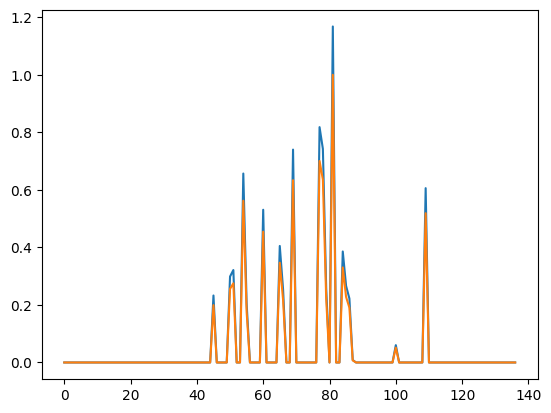

In [104]:
plt.plot(lasso_abs_coefs)
plt.plot(lasso_abs_coefs_norm)


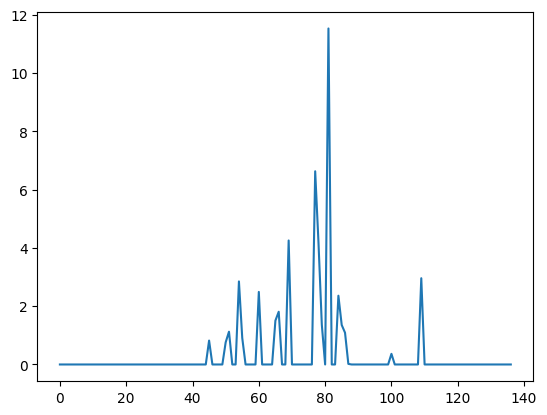

In [105]:
plt.plot(shap_sumabs_coefs)
# plt.plot(shap_sumabs_coefs_norm)


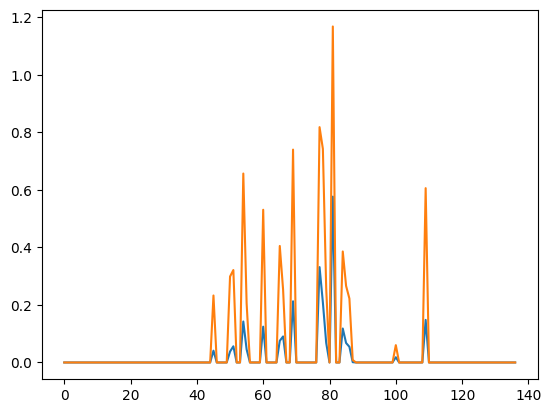

In [106]:
plt.plot(shap_sumabs_coefs/20)
plt.plot(lasso_abs_coefs)


In [107]:
df_cpgs["lasso_abs_coefs"] = lasso_abs_coefs
df_cpgs["lasso_abs_coefs_norm"] = lasso_abs_coefs_norm
df_cpgs["shap_sumabs_coefs"] = shap_sumabs_coefs

df_cpgs

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand,Significant,lasso_abs_coefs,lasso_abs_coefs_norm,shap_sumabs_coefs
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+,False,0.0,0.0,0.0
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+,False,0.0,0.0,0.0
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+,False,0.0,0.0,0.0
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+,False,0.0,0.0,0.0
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+,False,0.0,0.0,0.0
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+,False,0.0,0.0,0.0
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+,False,0.0,0.0,0.0
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+,False,0.0,0.0,0.0


In [134]:

import datetime     
today = datetime.date.today()
print("Today's date:", today)
save_name="CD55_CpGs_Annotated_K562cells_ZFPoffHigh_T2T_hg38_with_model_coefs_mCthresh0.995_"+str(today)+".csv"

df_cpgs.to_csv(save_name, index=True)
save_name

Today's date: 2025-11-09


'CD55_CpGs_Annotated_K562cells_ZFPoffHigh_T2T_hg38_with_model_coefs_mCthresh0.995_2025-11-09.csv'

In [109]:
len(df_cpgs), len(df_cpgs)//10,  df_cpgs.start_hg38.values[::len(df_cpgs)//10]

(137,
 13,
 array([207318092, 207319112, 207320882, 207321201, 207321360, 207321611,
        207321739, 207321797, 207321977, 207322217, 207323409]))

# Visualize CpG positions along the genomic region

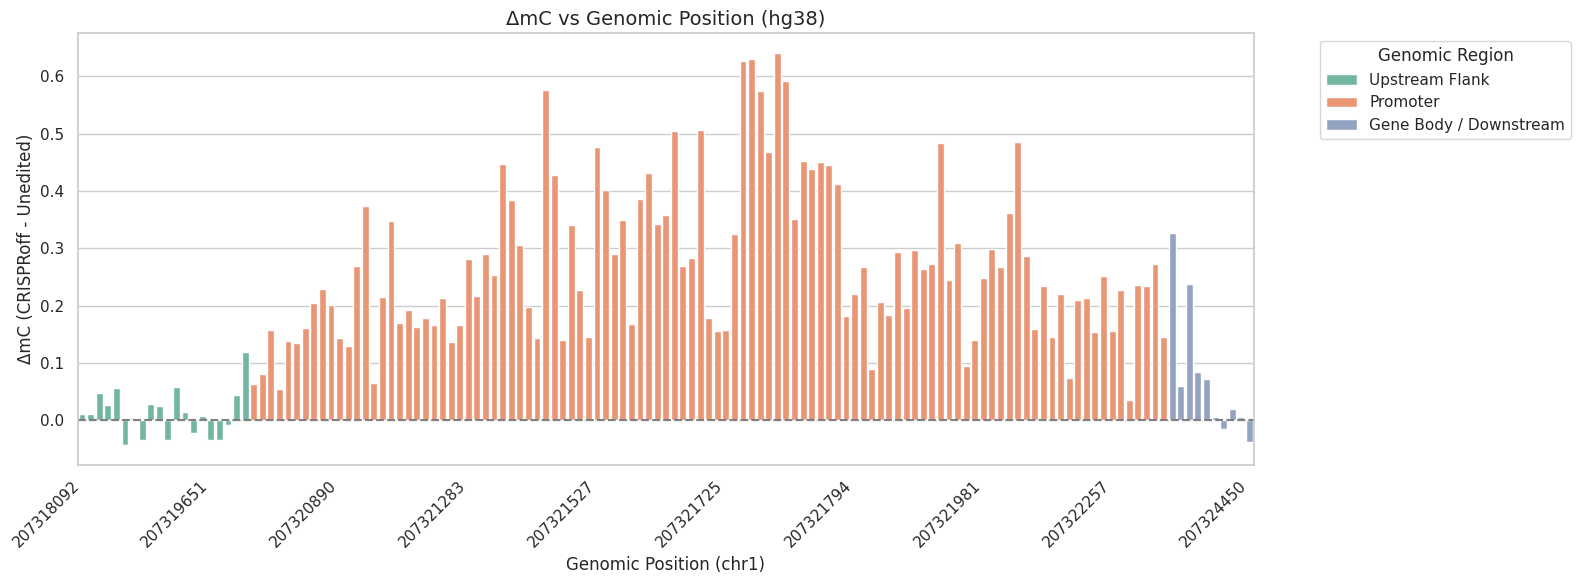

In [110]:

# Step 2: Define TSS (midpoint) and promoter boundaries
# cd55_tss = region_start + (region_length // 2)  # Assuming TSS = center
promoter_start_hg38 = cd55_tss_hg38 - 1000
promoter_end_hg38 = cd55_tss_hg38 + 1000

# Function to classify regions
def classify_region(pos, promoter_start=promoter_start_hg38, promoter_end=promoter_end_hg38):
    if promoter_start <= pos <= promoter_end:
        return "Promoter"
    elif pos < promoter_start:
        return "Upstream Flank"
    else:
        return "Gene Body / Downstream"

# # --- STEP 2: CREATE ANNOTATED DATAFRAME ---
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic_Position": cpg_positions
# })

# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)
# df_dmc["Region"] = df_dmc["Genomic_Position"].apply(classify_region)
# df_dmc["Chromosome"] = region_chr

df_cpgs["Region"] = df_cpgs["start_hg38"].apply(classify_region) #, args=(promoter_start_hg38, promoter_end_hg38))
df_cpgs["Chromosome"] = region_chr

# --- STEP 3: PLOT BARPLOT WITH CLEAN X-TICKS ---
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.barplot(
    data=df_cpgs,
    x="start_hg38",
    y="ΔmC",
    hue="Region",
    dodge=False,
    palette="Set2"
)

# Clean x-axis: show only 10 genomic positions
# tick_positions = np.linspace(0, len(df_cpgs) - 1, 10, dtype=int)
# tick_positions = [207318092, 207319112, 207320882, 207321201, 207321360, 207321611,
#         207321739, 207321797, 207321977, 207322217, 207323409]
# tick_positions = df_cpgs.start_hg38.values[::len(df_cpgs)//10]
tick_positions = np.linspace(0, len(df_cpgs) - 1, 10, dtype=int)
tick_labels = df_cpgs.loc[tick_positions, "start_hg38"]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right') #, fontsize=1) #  ha='right',

# Add reference line and labels
plt.axhline(0, color='gray', linestyle='--')
plt.title("ΔmC vs Genomic Position (hg38)", fontsize=14)
plt.xlabel("Genomic Position (chr1)")
plt.ylabel("ΔmC (CRISPRoff - Unedited)")
plt.legend(title="Genomic Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [111]:
cd55_tss_t2t

206586974

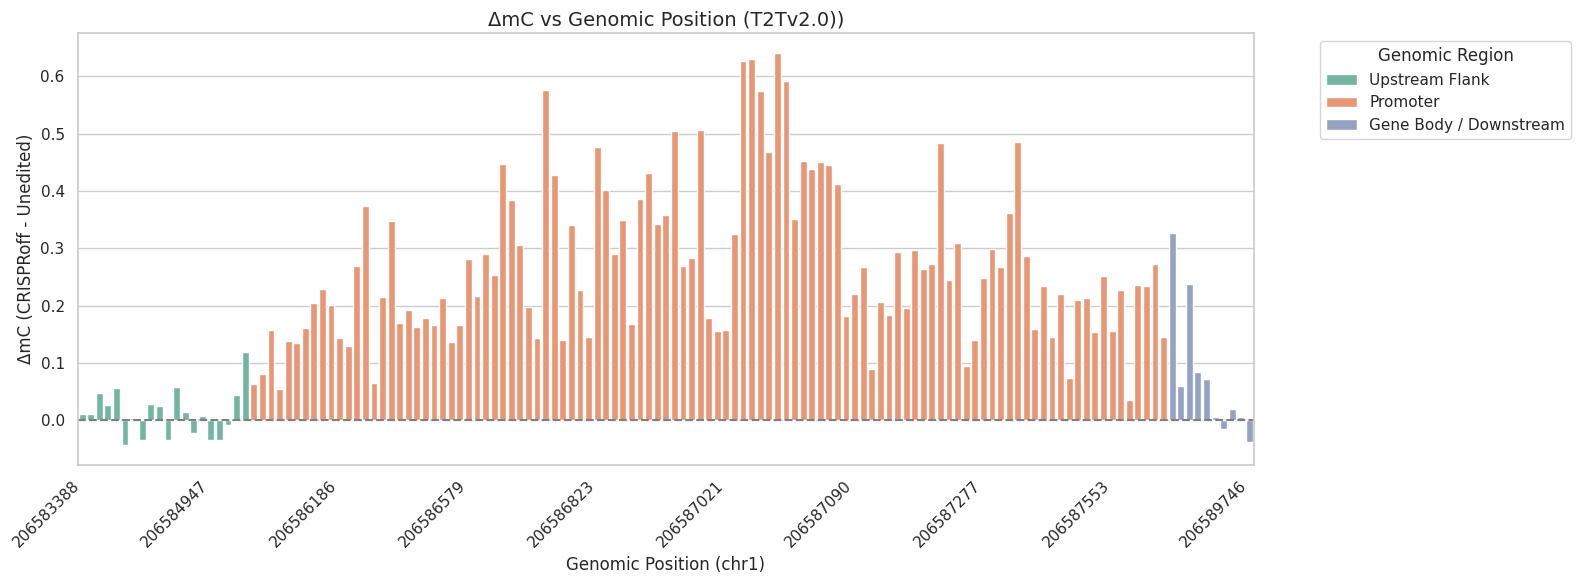

In [112]:
start_coord_columtn = "start_T2T"

# Step 2: Define TSS (midpoint) and promoter boundaries
# cd55_tss = region_start + (region_length // 2)  # Assuming TSS = center
promoter_start_t2t = cd55_tss_t2t - 1000
promoter_end_t2t = cd55_tss_t2t + 1000

# Function to classify regions
def classify_region(pos, promoter_start, promoter_end):
    if promoter_start <= pos <= promoter_end:
        return "Promoter"
    elif pos < promoter_start:
        return "Upstream Flank"
    else:
        return "Gene Body / Downstream"

# # --- STEP 2: CREATE ANNOTATED DATAFRAME ---
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic_Position": cpg_positions
# })

# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)
# df_dmc["Region"] = df_dmc["Genomic_Position"].apply(classify_region)
# df_dmc["Chromosome"] = region_chr

df_cpgs["Region"] = df_cpgs[start_coord_columtn].apply(classify_region, args=(promoter_start_t2t, promoter_end_t2t))
df_cpgs["Chromosome"] = region_chr

# --- STEP 3: PLOT BARPLOT WITH CLEAN X-TICKS ---
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.barplot(
    data=df_cpgs,
    x=start_coord_columtn,
    y="ΔmC",
    hue="Region",
    dodge=False,
    palette="Set2"
)

# Clean x-axis: show only 10 genomic positions
# tick_positions = np.linspace(0, len(df_cpgs) - 1, 10, dtype=int)
# tick_positions = [207318092, 207319112, 207320882, 207321201, 207321360, 207321611,
#         207321739, 207321797, 207321977, 207322217, 207323409]
# tick_positions = df_cpgs.start_hg38.values[::len(df_cpgs)//10]
tick_positions = np.linspace(0, len(df_cpgs) - 1, 10, dtype=int)
tick_labels = df_cpgs.loc[tick_positions, start_coord_columtn]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right') #, fontsize=1) #  ha='right',

# Add reference line and labels
plt.axhline(0, color='gray', linestyle='--')
plt.title("ΔmC vs Genomic Position (T2Tv2.0))", fontsize=14)
plt.xlabel("Genomic Position (chr1)")
plt.ylabel("ΔmC (CRISPRoff - Unedited)")
plt.legend(title="Genomic Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [113]:
df_cpgs

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand,Significant,lasso_abs_coefs,lasso_abs_coefs_norm,shap_sumabs_coefs,Chromosome
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+,False,0.0,0.0,0.0,chr1
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+,False,0.0,0.0,0.0,chr1
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+,False,0.0,0.0,0.0,chr1
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+,False,0.0,0.0,0.0,chr1
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+,False,0.0,0.0,0.0,chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1


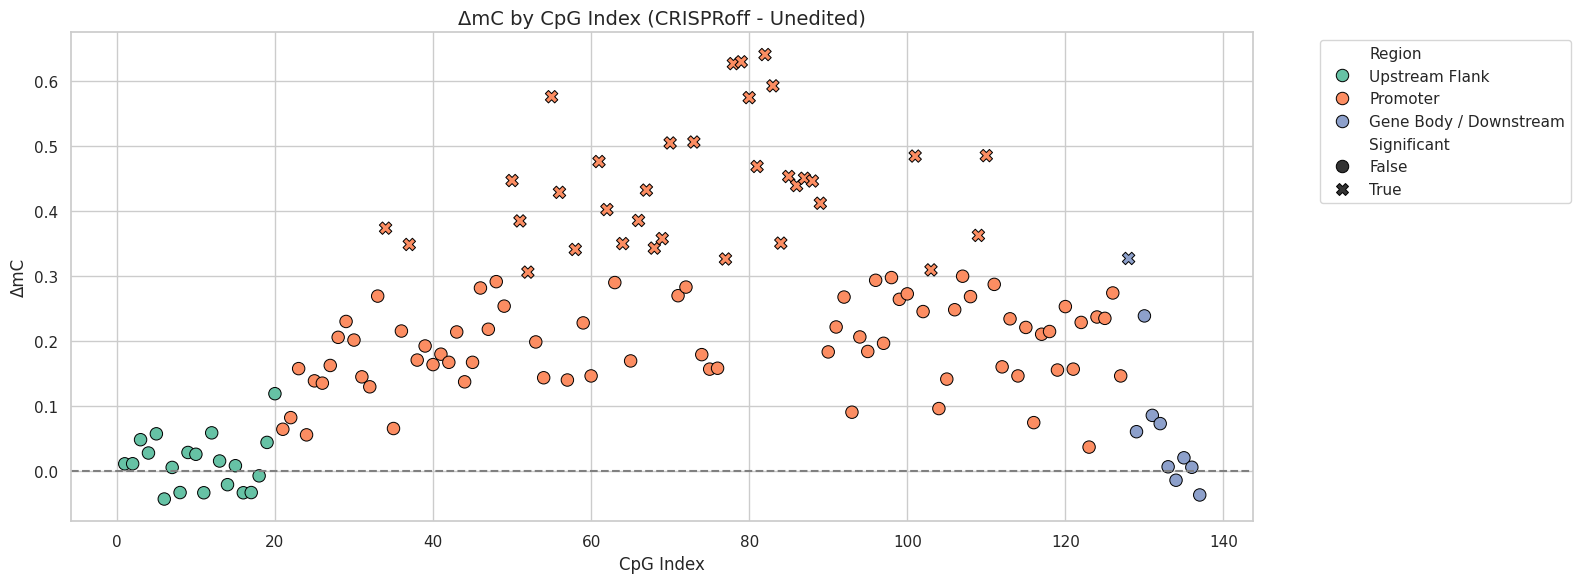

In [114]:

# --- STEP 2: SCATTER PLOT ---

plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=df_cpgs,
    x="CpG Index",
    y="ΔmC",
    hue="Region",
    style="Significant",
    palette="Set2",
    s=80,
    edgecolor='black'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title("ΔmC by CpG Index (CRISPRoff - Unedited)", fontsize=14)
plt.xlabel("CpG Index")
plt.ylabel("ΔmC")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [115]:
df_cpgs

,CpG Index,chrom,start_hg38,end_hg38,start_T2T,end_T2T,name,ΔmC,score,rel_to_TSS_hg38,rel_to_TSS_T2T,Region,strand,Significant,lasso_abs_coefs,lasso_abs_coefs_norm,shap_sumabs_coefs,Chromosome
0,1,chr1,207318092,207318094,206583388,206583390,CpG_1,0.010559,11,-3586,-3586,Upstream Flank,+,False,0.0,0.0,0.0,chr1
1,2,chr1,207318412,207318414,206583708,206583710,CpG_2,0.010681,11,-3266,-3266,Upstream Flank,+,False,0.0,0.0,0.0,chr1
2,3,chr1,207318471,207318473,206583767,206583769,CpG_3,0.047697,48,-3207,-3207,Upstream Flank,+,False,0.0,0.0,0.0,chr1
3,4,chr1,207318809,207318811,206584105,206584107,CpG_4,0.027199,27,-2869,-2869,Upstream Flank,+,False,0.0,0.0,0.0,chr1
4,5,chr1,207318842,207318844,206584138,206584140,CpG_5,0.056745,57,-2836,-2836,Upstream Flank,+,False,0.0,0.0,0.0,chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,chr1,207323695,207323697,206588991,206588993,CpG_133,0.005959,6,2017,2017,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
133,134,chr1,207323863,207323865,206589159,206589161,CpG_134,-0.014705,0,2185,2185,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
134,135,chr1,207323917,207323919,206589213,206589215,CpG_135,0.019827,20,2239,2239,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1
135,136,chr1,207324141,207324143,206589437,206589439,CpG_136,0.005237,5,2463,2463,Gene Body / Downstream,+,False,0.0,0.0,0.0,chr1


In [116]:
df_cpgs.start_hg38.values

array([207318092, 207318412, 207318471, 207318809, 207318842, 207318856,
       207318881, 207318883, 207318906, 207318932, 207318977, 207319009,
       207319100, 207319112, 207319116, 207319651, 207319939, 207320084,
       207320502, 207320601, 207320725, 207320825, 207320868, 207320873,
       207320878, 207320880, 207320882, 207320884, 207320886, 207320888,
       207320890, 207320892, 207320932, 207320991, 207321008, 207321032,
       207321127, 207321158, 207321199, 207321201, 207321213, 207321215,
       207321223, 207321241, 207321251, 207321283, 207321285, 207321296,
       207321304, 207321312, 207321316, 207321332, 207321360, 207321371,
       207321383, 207321388, 207321423, 207321474, 207321507, 207321522,
       207321527, 207321534, 207321537, 207321551, 207321585, 207321611,
       207321633, 207321662, 207321670, 207321693, 207321698, 207321702,
       207321709, 207321717, 207321722, 207321725, 207321733, 207321736,
       207321739, 207321741, 207321757, 207321760, 

In [117]:

# # Step 2: Create a DataFrame
# df_dmc = pd.DataFrame({
#     "CpG Index": np.arange(1, len(dif_D6_mCthresh_995)+1),
#     "ΔmC": dif_D6_mCthresh_995
# })

# # Step 3: Define significance threshold
# # You can adjust the thresholds based on biological interest
# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)

# # Step 4: Filter top differentially methylated CpGs
# top_dmc = df_dmc[df_dmc["Significant"]].sort_values(by="ΔmC", ascending=False)

# # Step 5 (optional): Save as CSV
# top_dmc.to_csv("Top_Differential_mCs.csv", index=False)

# # Print or display
# print(top_dmc)

In [119]:
# import numpy as np
# import pandas as pd

# # ΔmC array (replace with your actual data if loading from file)
# # dif_D6_mCthresh_995 = np.array([...])  # Your full ΔmC array goes here

# # Metadata from user
# region_chr = "chr1"
# region_start = 206583354
# region_end = 206589854
# region_length = region_end - region_start
# cpg_count = len(dif_D6_mCthresh_995)

# # Step 1: Generate CpG index and position
# cpg_indices = np.arange(1, cpg_count + 1)
# cpg_positions = np.linspace(region_start, region_end, cpg_count, dtype=int)

# # Step 2: Define TSS (midpoint) and promoter boundaries
# cd55_tss = region_start + (region_length // 2)  # Assuming TSS = center
# promoter_start = cd55_tss - 1000
# promoter_end = cd55_tss + 1000

# # Step 3: Classify region
# def classify_region(pos):
#     if promoter_start <= pos <= promoter_end:
#         return "Promoter"
#     elif pos < promoter_start:
#         return "Upstream Flank"
#     else:
#         return "Gene Body / Downstream"

# # Step 4: Create DataFrame
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic Position (T2T v2.0)": cpg_positions
# })

# # Step 5: Annotate significant ΔmC
# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)

# # Step 6: Annotate region type
# df_dmc["Region"] = df_dmc["Genomic Position (T2T v2.0)"].apply(classify_region)

# # Step 7: Add chromosome column
# df_dmc["Chromosome"] = region_chr

# # Step 8: Rearrange columns
# df_dmc = df_dmc[[
#     "Chromosome", "CpG Index", "Genomic Position (T2T v2.0)",
#     "ΔmC", "Significant", "Region"
# ]]

# # Optional: save to CSV
# df_dmc.to_csv("Annotated_Delta_mC_T2T.csv", index=False)

# # Print preview
# print(df_dmc.head())


In [120]:
# df_dmc

In [121]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- STEP 1: DATA PREP ---

# # # Paste your actual ΔmC array here
# # dif_D6_mCthresh_995 = np.array([
# #     # paste all 142 values here
# # ])

# # # Metadata
# # region_chr = "chr1"
# # region_start = 206583354
# # region_end = 206589854
# # region_length = region_end - region_start
# # cpg_count = len(dif_D6_mCthresh_995)

# # Generate CpG indices and positions
# cpg_indices = np.arange(1, cpg_count + 1)
# cpg_positions = np.linspace(region_start, region_end, cpg_count, dtype=int)

# # Define TSS (center) and promoter boundaries
# cd55_tss = region_start + (region_length // 2)
# promoter_start = cd55_tss - 1000
# promoter_end = cd55_tss + 1000

# # Classify region
# def classify_region(pos):
#     if promoter_start <= pos <= promoter_end:
#         return "Promoter"
#     elif pos < promoter_start:
#         return "Upstream Flank"
#     else:
#         return "Gene Body / Downstream"

# # Create dataframe
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic Position (T2T v2.0)": cpg_positions
# })

# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)
# df_dmc["Region"] = df_dmc["Genomic Position (T2T v2.0)"].apply(classify_region)
# df_dmc["Chromosome"] = region_chr



In [123]:

# # --- STEP 2: SCATTER PLOT ---

# plt.figure(figsize=(16, 6))
# sns.scatterplot(
#     data=df_dmc,
#     x="CpG Index",
#     y="ΔmC",
#     hue="Region",
#     style="Significant",
#     palette="Set2",
#     s=80,
#     edgecolor='black'
# )
# plt.axhline(0, color='gray', linestyle='--')
# plt.title("ΔmC by CpG Index (CRISPRoff - Unedited)", fontsize=14)
# plt.xlabel("CpG Index")
# plt.ylabel("ΔmC")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # --- STEP 3: HEATMAP ---

# # Reshape data for heatmap (sorted by region for clarity)
# df_sorted = df_dmc.sort_values(by=["Region", "CpG Index"])
# heatmap_data = df_sorted.pivot_table(index="CpG Index", values="ΔmC")

# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     heatmap_data,
#     cmap="coolwarm",
#     center=0,
#     cbar_kws={'label': 'ΔmC'}
# )
# plt.title("ΔmC Heatmap by CpG Site")
# plt.ylabel("CpG Index (Sorted by Region)")
# plt.xlabel("ΔmC")
# plt.tight_layout()
# plt.show()

# # --- STEP 4: VOLCANO/BAR PLOT BY POSITION ---

# plt.figure(figsize=(16, 6))
# sns.barplot(
#     data=df_dmc,
#     x="Genomic Position (T2T v2.0)",
#     y="ΔmC",
#     hue="Region",
#     dodge=False,
#     palette="Set2"
# )
# plt.xticks(rotation=90)
# plt.axhline(0, color='gray', linestyle='--')
# plt.title("ΔmC vs Genomic Position (T2T v2.0)")
# plt.xlabel("Genomic Position (chr1)")
# plt.ylabel("ΔmC")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [125]:

# # Function to classify regions
# def classify_region(pos):
#     if promoter_start <= pos <= promoter_end:
#         return "Promoter"
#     elif pos < promoter_start:
#         return "Upstream Flank"
#     else:
#         return "Gene Body / Downstream"

# # --- STEP 2: CREATE ANNOTATED DATAFRAME ---
# df_dmc = pd.DataFrame({
#     "CpG Index": cpg_indices,
#     "ΔmC": dif_D6_mCthresh_995,
#     "Genomic_Position": cpg_positions
# })

# df_dmc["Significant"] = (df_dmc["ΔmC"] > 0.3) | (df_dmc["ΔmC"] < -0.1)
# df_dmc["Region"] = df_dmc["Genomic_Position"].apply(classify_region)
# df_dmc["Chromosome"] = region_chr

# # --- STEP 3: PLOT BARPLOT WITH CLEAN X-TICKS ---
# sns.set(style="whitegrid")

# plt.figure(figsize=(16, 6))
# ax = sns.barplot(
#     data=df_dmc,
#     x="Genomic_Position",
#     y="ΔmC",
#     hue="Region",
#     dodge=False,
#     palette="Set2"
# )

# # Clean x-axis: show only 10 genomic positions
# tick_positions = np.linspace(0, len(df_dmc) - 1, 10, dtype=int)
# tick_labels = df_dmc.loc[tick_positions, "Genomic_Position"]
# ax.set_xticks(tick_positions)
# ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# # Add reference line and labels
# plt.axhline(0, color='gray', linestyle='--')
# plt.title("ΔmC vs Genomic Position (T2T v2.0)", fontsize=14)
# plt.xlabel("Genomic Position (chr1)")
# plt.ylabel("ΔmC (CRISPRoff - Unedited)")
# plt.legend(title="Genomic Region", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [ ]:
plt.savefig("delta_mC_vs_genomic_position_T2T.png", dpi=300)
# or for vector graphics:
plt.savefig("delta_mC_vs_genomic_position_T2T.pdf")


<Figure size 640x480 with 0 Axes>

# Add Hg38 coords!

🧠 Why This Works

This assumes:

No rearrangements or insertions in the corresponding T2T vs hg38 region

The coordinates align linearly (which is true for many protein-coding loci like CD55)

If you later need precision mapping with alignment files, you can use liftOver with chain files between T2T and hg38.

In [132]:
# hg38_start     = 207318058  
# t2t_start      = 206583354  
# genomic_offset = hg38_start - t2t_start #= +734704
# print("Genomic offset (hg38 - T2T v2.0): ", genomic_offset)

# # CpG_hg38 = CpG_T2T + 734,704


In [131]:
# # Step 1: Define offset
# hg38_offset = 734704  # Computed as hg38_start - t2t_start

# # Step 2: Add new column with hg38 positions
# df_dmc["Genomic_Position_hg38"] = df_dmc["Genomic_Position"] + hg38_offset

# # Step 3 (Optional): Reorder columns for clarity
# df_dmc = df_dmc[[
#     "CpG Index", "Genomic_Position", "Genomic_Position_hg38",
#     "ΔmC", "Significant", "Region"
# ]]

# # Step 4: Save if needed
# df_dmc.to_csv("Annotated_CpGs_with_hg38.csv", index=False)

# # Show preview
# print(df_dmc.head())


In [130]:
# # Convert to BED format (0-based start, 1-based end)
# df_bed = pd.DataFrame({
#     "chrom": "chr1",
#     "start": df_dmc["Genomic_Position_hg38"],
#     "end": df_dmc["Genomic_Position_hg38"] + 1,
#     "name": "CpG_" + df_dmc["CpG Index"].astype(str),
#     "score": (df_dmc["ΔmC"] * 1000).round(1),  # scale to 0-1000 range for UCSC
#     "strand": "+"
# })

# # Optional: sort by genomic position
# df_bed = df_bed.sort_values(by="start")

# # Save as BED
# df_bed.to_csv("cd55_dmc_cpgs.hg38.bed", sep="\t", index=False, header=False)


# df_bed

You're seeing that error because UCSC Genome Browser doesn't accept .csv files directly — it expects standard genome formats like:

.bed, .wig, .bigWig, .bigBed, .bam, etc.

✅ Solution

You need to:

1. ✅ Export the file in BED format

You’ve already created a CSV (Annotated_CpGs_with_hg38.csv), but for genome browser upload, you must use BED format, which has:

chrom    start    end    name    score    strand


In [129]:
# # Convert annotated CpG data to BED format for UCSC Genome Browser

# # Step 1: Calculate BED coordinates (0-based start, 1-based end)
# df_bed = pd.DataFrame({
#     "chrom": "chr1",
#     "start": df_dmc["Genomic_Position_hg38"],
#     "end": df_dmc["Genomic_Position_hg38"] + 1,  # 1 bp span
#     "name": "CpG_" + df_dmc["CpG Index"].astype(str),
#     "score": (df_dmc["ΔmC"] * 1000).round(1),  # scaled to UCSC score range
#     "strand": "+"
# })

# # Step 2: Optional sorting
# df_bed = df_bed.sort_values(by="start")

# # Step 3: Save as tab-delimited BED file (NO HEADER)
# df_bed.to_csv("cd55_dmc_cpgs.hg38.bed", sep="\t", index=False, header=False)

# df_bed


In [128]:
# # Create UCSC-compatible BED from annotated ΔmC table
# df_bed = pd.DataFrame({
#     "chrom": "chr1",
#     "start": df_dmc["Genomic_Position_hg38"],
#     "end": df_dmc["Genomic_Position_hg38"] + 1,
#     "name": "CpG_" + df_dmc["CpG Index"].astype(str),
#     "score": (df_dmc["ΔmC"] * 1000).round(0).astype(int),  # UCSC expects int scores from 0–1000
#     "strand": "+"
# })

# # Clip scores to UCSC-compliant range
# df_bed["score"] = df_bed["score"].clip(lower=0, upper=1000)

# # Save as plain BED file with no header
# df_bed.to_csv("cd55_dmc_cpgs_INTscores.hg38.bed", sep="\t", index=False, header=False)
# df_bed

✅ UCSC Track Line (Required for Upload)

When uploading this BED file to the UCSC Genome Browser, you'll need to add a "track" line manually in the custom tracks section:

track name="CD55 ΔmC CpGs" description="CRISPRoff vs Unedited T cells" visibility=2 itemRgb="On" useScore=1


Then paste or upload your cd55_dmc_cpgs.hg38.bed file content below that line.